<a href="https://colab.research.google.com/github/sreeproject/AI-/blob/main/Another_copy_of_Yet_another_copy_of_EMI_ML_Submission_Template_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    :-   EMIPredict AI - Intelligent Financial Risk Assessment Platform





##### **Project Type**    - EDA/Regression/Classification
##### **Contribution**    - Individual

# **Project Summary -**

Many individuals struggle to pay EMIs due to poor financial planning and limited risk assessment. This project builds a comprehensive financial risk assessment platform that leverages machine learning to provide actionable insights for smarter loan decisions. It addresses dual ML problems: classification for EMI eligibility and regression for maximum EMI amount, using 400,000 financial records. Advanced feature engineering on 22 financial and demographic variables enhances model accuracy, while MLflow integration enables experiment tracking and model comparison. Deployed as an interactive Streamlit web application, the platform delivers real-time predictions, empowering users and lenders to make informed, data-driven financial decisions.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Build a comprehensive financial risk assessment platform that integrates machine learning models with MLflow experiment tracking to create an interactive web application for EMI prediction.
Nowadays, people struggle to pay EMI due to poor financial planning and inadequate risk assessment. This project aims to solve this critical issue by providing data-driven insights for better loan decisions.
The platform should deliver:
Dual ML problem solving: Classification (EMI eligibility) and Regression (maximum EMI amount)
Real-time financial risk assessment using 400,000 records
Advanced feature engineering from 22 financial and demographic variables
ML flow integration for model tracking and comparison
Streamlit Cloud deployment for production-ready access


# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
emi_pred_df = pd.read_csv('emi_prediction_dataset.csv')

### Dataset First View

In [ ]:
# Dataset First Look
emi_pred_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
emi_pred_df.shape

### Dataset Information

In [ ]:
# Dataset Info
emi_pred_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
print("Duplicated values:",emi_pred_df.duplicated().sum())

There is no dupicted values

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
print("Missing values:", emi_pred_df.isnull().sum().sum())

12027 missing values are there

In [ ]:
emi_pred_df.isnull().sum()

Education,montly rent,credit score,bank_balance,emergency_fund, contains more than 30% of missing values

In [ ]:
# Visualizing the missing values
# ==============================
plt.figure(figsize=(10, 6))
sns.heatmap(emi_pred_df.isnull(), cbar=False, cmap="Blues")
plt.title("🔍 Missing Values Heatmap")
plt.show()

In [ ]:
#Visualize Missing Values - Bar Chart
# ==============================
missing = emi_pred_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

if len(missing) > 0:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=missing.index, y=missing.values, palette="viridis")
    plt.title("📊 Missing Values per Column")
    plt.ylabel("Count of Missing Values")
    plt.xticks(rotation=45)
    plt.show()
else:
    print("✅ No missing values found in the dataset.")

In [ ]:
emi_pred_df

### What did you know about your dataset?

Emi dataset contains 404800 entries and 27 columns are there. It containing no duplicate values. The data set containg 12027 missing values.Education,montly rent,credit score,bank_balance,emergency_fund, contains more than 30% of missing values. It cotains 15 numeric variables and 12 categorical variables are there. The variables are 'age', 'gender', 'marital_status', 'education', 'monthly_salary',
'employment_type', 'years_of_employment', 'company_type', 'house_type',
'monthly_rent', 'family_size', 'dependents', 'school_fees',
'college_fees', 'travel_expenses', 'groceries_utilities', 'other_monthly_expenses', 'existing_loans', 'current_emi_amount',
'credit_score', 'bank_balance', 'emergency_fund', 'emi_scenario',
'requested_amount', 'requested_tenure', 'emi_eligibility','max_monthly_emi'. In thes 2 target variables are there.They are 'emi_eligibility','max_monthly_emi'. The vaeriable EMI Scenarios contains 5 lending categories with realistic distributions they are E-commerce Shopping EMI, Home Appliances EMI,Vehicle EMI,Personal Loan EMI,Education EMI.


## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
emi_pred_df.columns

In [ ]:
emi_pred_df.dtypes

In [ ]:
# Step 4. Identify Data Types
# ------------------------------------------------------------
num_cols = emi_pred_df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = emi_pred_df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f" Numeric columns: {len(num_cols)}")
print(f" Categorical columns: {len(cat_cols)}")

In [ ]:
# Dataset Describe
emi_pred_df.describe()

### Variables Description

.Personal Demographics:

age: Customer age (25-60 years)

gender: Gender classification (Male/Female)

marital_status: Marital status (Single/Married)

education: Educational qualification (High School/Graduate/Post Graduate/Professional)

.Employment and Income:

monthly_salary: Monthly gross salary (15K-200K INR)

employment_type: Employment category (Private/Government/Self-employed)

years_of_employment: Work experience duration

company_type: Organization size and type

.Housing and Family:

house_type: Residential ownership status (Rented/Own/Family)

monthly_rent: Monthly rental expenses

family_size: Total household members

dependents: Number of financial dependents

.Monthly Financial Obligations:

school_fees: Educational expenses for dependents

college_fees: Higher education costs

travel_expenses: Monthly transportation costs

groceries_utilities: Essential living expenses

other_monthly_expenses: Miscellaneous financial obligations

.Financial Status and Credit History:

existing_loans: Current loan obligations status

current_emi_amount: Existing monthly EMI burden

credit_score: Credit worthiness score (300-850)

bank_balance: Current account balance

emergency_fund: Available emergency savings

.Loan Application Details:

emi_scenario: Type of EMI application (5 categories) E-commerce Shopping EMI, Home Appliances EMI,Vehicle EMI,Personal Loan EMI,Education EMI.

requested_amount: Desired loan amount

requested_tenure: Preferred repayment period in months

Target Variables:

Classification Target:

emi_eligibility: Primary classification target with 3 classes
Eligible: Low risk, comfortable EMI affordability
High_Risk: Marginal case, requires higher interest rates
Not_Eligible: High risk, loan not recommended

Regression Target:

max_monthly_emi: Primary regression target
Continuous variable representing maximum safe monthly EMI amount (500-50000 INR)
Calculated using comprehensive financial capacity analysis


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
emi_pred_df.nunique()

## 3. ***Data Wrangling***

### Data Wrangling Code

###Handling missing values

In [ ]:
# Protect key predictor variables
important_cols = ["credit_score", "bank_balance"]

# Work on a copy of the dataframe
emi_pred_df1 = emi_pred_df.copy()

# Identify columns with >80% missing values
high_missing_cols = missing[missing > 80].index.tolist()

# Remove important columns from the drop list
high_missing_cols = [col for col in high_missing_cols if col not in important_cols]

print("\nColumns with >80% missing (to drop, excluding key predictors):")
print(high_missing_cols)

# Safe drop
emi_pred_df1.drop(columns=high_missing_cols, inplace=True, errors='ignore')


In [ ]:
emi_pred_df1.head(1)

In [ ]:
emi_pred_df1.columns

Missing columns are 'education','monthly_rent', 'emergency_fund'

In [ ]:
emi_pred_df1.isnull().sum()

###Handling missing values

In [ ]:
emi_pred_df1['credit_score'].fillna(emi_pred_df1['credit_score'].median(), inplace=True)

In [ ]:
# Convert 'bank_balance' to numeric, coercing errors to NaN, before calculating and filling with the median
emi_pred_df1['bank_balance'] = pd.to_numeric(emi_pred_df1['bank_balance'], errors='coerce')
emi_pred_df1['bank_balance'].fillna(emi_pred_df1['bank_balance'].median(), inplace=True)

In [ ]:
emi_pred_df1.isnull().sum().sum()

####There is no missing values now

In [ ]:
emi_pred_df1.shape

Now datasets size has changed now it contains 24 columns above it was 27.

In [ ]:
emi_pred_df1.columns

In [ ]:
# Write your code to make your dataset analysis ready.

### What all manipulations have you done and insights you found?

Education,montly rent,credit score,bank_balance and emergency_fund contain more than 30% of missing values. Here can't drop credit score,bank_balance columns. So i drop variables containg more than 80% of missing values . so drop Education,montly rent,emergency_fund and handle credit_score,bank_balance with fillna(.median) method

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
#Distribution of EMI Eligibility
# ---------------------------------------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x='emi_eligibility', data=emi_pred_df1, palette='crest')
plt.title("Distribution of EMI Eligibility")
plt.xlabel("EMI Eligibility")
plt.ylabel("Count")
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart shows the distribution of EMI eligibility across three categories: Not_Eligible, Eligible, and High_Risk. The majority of individuals fall under Not_Eligible, indicating a large portion of applicants are unlikely to qualify for EMI. Far fewer applicants are classified as Eligible or High_Risk, highlighting the dataset’s imbalance and the need for targeted risk assessment.

##### 2. What is/are the insight(s) found from the chart?

rom the chart, the key insights are:

Majority are not eligible: The largest portion of the dataset (~310,000 records) falls under “Not_Eligible,” indicating that most applicants in the dataset are rejected for EMI.

Smaller eligible population: A moderate number (~75,000) of applicants are classified as “Eligible,” showing that only a minority qualify for EMI.

Very few high-risk cases: The “High_Risk” category is the smallest (~18,000), suggesting that extreme-risk applicants are relatively rare compared to the other categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights reveal that strict credit assessments minimize default risk and the High_Risk segment is effectively controlled, supporting positive business outcomes. Targeting the eligible population with personalized EMI offers can boost approved loans and revenue. However, the large Not_Eligible group indicates missed opportunities, and overly conservative rejection criteria could reduce market share and slow growth.

#### Chart - 2

In [ ]:
#EMI Eligibility Across Scenarios
# ---------------------------------------------------------------
plt.figure(figsize=(10,6))
sns.countplot(x='emi_scenario', hue='emi_eligibility', data=emi_pred_df1, palette='Set2')
plt.title("EMI Eligibility Distribution Across Lending Scenarios")
plt.xlabel("EMI Scenario")
plt.ylabel("Number of Applicants")
plt.legend(title="Eligibility")
plt.show()

##### 1. Why did you pick the specific chart?

I would pick this grouped bar chart because it clearly shows the distribution of EMI eligibility categories across different lending scenarios. It allows easy comparison between the number of Not_Eligible, Eligible, and High_Risk applicants within each scenario, highlighting patterns and differences. This visualization is ideal for identifying trends, such as which EMI types have the highest approval rates or the lowest risk exposure.

##### 2. What is/are the insight(s) found from the chart?

The charts reveal that despite all shifts operating in a tight band, the Morning shift poses the most significant performance risk with the lowest average CSAT score of $\mathbf{4.19}$, making it the primary target for improvement. Conversely, the Split shift is the clear high performer at $\mathbf{4.43}$, demonstrating a service standard that the entire team should strive to meet. The consistency of the Afternoon, Night, and Evening shifts (all near $\mathbf{4.28}$) suggests stable, slightly above-average operations during these periods. Therefore, focused intervention on the Morning shift, likely through resource reallocation or specific coaching, is the fastest way to raise the overall CSAT performance.

#### Chart - 3

In [ ]:
#Percentage Distribution per Scenario
# ---------------------------------------------------------------
scenario_eligibility = (
    emi_pred_df1.groupby(['emi_scenario', 'emi_eligibility'])
    .size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
)

print("\n📈 EMI Eligibility % by Scenario:")
print(scenario_eligibility.round(2))

scenario_eligibility.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title("Percentage of Eligible vs Non-Eligible by Scenario")
plt.ylabel("Percentage (%)")
plt.show()

##### 1. Why did you pick the specific chart?

This stacked bar chart shows the percentage distribution of EMI eligibility categories across different EMI scenarios. In every scenario, the Not_Eligible group is the largest, indicating that most applicants do not meet the required criteria. The Eligible segment consistently falls between roughly 15–28%, while the High_Risk segment remains very small across all categories. Overall, the trend suggests strict eligibility criteria with limited high-risk approvals across all EMI types.

##### 2. What is/are the insight(s) found from the chart?

Majority of applicants are Not Eligible across all EMI scenarios, indicating strict eligibility criteria or a large proportion of financially weak applicants.

Eligible customers form a consistent but smaller share (around 15–28%), showing that only a minority qualify for EMI benefits in each scenario.

High_Risk applicants represent a very small segment in every scenario, meaning that high-risk cases are being identified and likely filtered out effectively.

Among all categories, E-commerce and Home Appliances EMI show the highest Eligible percentage, suggesting these segments may be more affordable or have more relaxed approval criteria compared to others like Personal Loan and Vehicle EMI.

#### Chart - 4

In [ ]:
#Compare Key Financial Features by Eligibility
# ---------------------------------------------------------------
num_features = ['monthly_salary', 'credit_score', 'bank_balance', 'current_emi_amount']
num_features = [col for col in num_features if col in   emi_pred_df1.columns]

for feature in num_features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x='emi_eligibility', y=feature, data=emi_pred_df1, palette='coolwarm')
    plt.title(f"{feature} Distribution by EMI Eligibility")
    plt.show()

##### 1. Why did you pick the specific chart?

Graph 1.This boxplot compares the distribution of monthly salary across three EMI eligibility categories: Not_Eligible, Eligible, and High_Risk. All three groups show a wide range of salaries, but their median values are relatively similar, indicating that salary alone does not fully determine eligibility. However, the High_Risk group appears to have slightly higher median salary, which suggests that being high-risk is likely influenced by other factors such as credit history, debt, or spending behavior rather than income. The long whiskers and dense outliers in all categories indicate a highly skewed salary distribution with a significant number of extreme values.

Graph2. This boxplot shows the distribution of credit scores across three EMI eligibility groups: Not_Eligible, Eligible, and High_Risk. The Eligible group has the highest median credit score, indicating that strong credit history is a key factor in EMI approval. The Not_Eligible group has noticeably lower credit scores on average, which explains why they may not qualify. The High_Risk group has relatively high median scores but includes many extreme outliers (very low and very high values), suggesting that inconsistent or unstable credit behavior may be influencing their risk classification despite having decent scores.

Graph 3.This boxplot illustrates the bank balance distribution across EMI eligibility categories: Not_Eligible, Eligible, and High_Risk. The Eligible group clearly has a higher median bank balance than the other two groups, indicating that customers with stronger financial reserves are more likely to qualify for EMI. The Not_Eligible group shows the lowest overall balances, which may contribute to rejection due to insufficient liquidity. The High_Risk group has a moderate bank balance but displays many extreme outliers, suggesting inconsistent financial behavior despite having some high-balance individuals.

Graph 4. This boxplot shows the distribution of current EMI amounts among three EMI eligibility groups: Not_Eligible, Eligible, and High_Risk. The Not_Eligible group has significantly higher current EMI amounts compared to the other groups, suggesting that high existing debt may be a major reason for rejection. Both the Eligible and High_Risk groups have much lower median EMI values, indicating that lower existing debt improves eligibility or risk classification. The large number of extreme outliers across all categories highlights that some individuals carry unusually high EMI burdens, but these cases are less common among approved or high-risk applicants.

##### 2.What is/are the insight(s) found from the chart?

Graph 1. The box plots show the distribution of monthly_salary across the three categories of emi_eligibility: Not_Eligible, Eligible, and High_Risk. The most significant insight is that the median monthly salary (represented by the line inside the box) appears to be nearly identical across all three eligibility groups. Furthermore, the interquartile range (IQR), which is the spread of the middle 50% of salaries (the height of the box), is also almost the same for Not_Eligible, Eligible, and High_Risk applicants. This suggests that monthly salary alone is not a strong distinguishing factor or primary determinant for EMI eligibility in this dataset, as all groups have similar central tendencies and spread, though all groups contain many visible outliers (the dots below the main whisker).

Graph 2. The box plot illustrates the distribution of the credit_score across the three emi_eligibility categories. The most notable insight is that the Eligible group has the highest median credit score and the tightest interquartile range (IQR), suggesting this group generally possesses better credit quality. In contrast, the Not_Eligible group has the lowest median credit score and the broadest IQR, indicating a wider and lower spread of credit scores. This evidence suggests that the credit score is a significant factor in determining EMI eligibility, as higher scores correlate strongly with eligibility.

Graph 3. The box plot displays the distribution of bank_balance across the three emi_eligibility categories. The most striking finding is that the Eligible group has the highest median bank balance and the broadest interquartile range (IQR), indicating they generally hold larger balances. The Not_Eligible group shows the lowest median balance and the smallest IQR, suggesting they typically have less money in their accounts. This pattern indicates that a higher bank balance is positively correlated with EMI eligibility, likely serving as a key factor in risk assessment, although all categories contain significant outliers representing very high balances.

Graph 4. Not_Eligible applicants have significantly higher current EMI amounts compared to Eligible and High_Risk groups, indicating that high existing debt is a major factor in EMI rejection.

Eligible applicants generally carry very low existing EMI, showing that low debt burden strongly increases approval chances.

High_Risk users also have low current EMI amounts, implying that their risk classification comes from factors other than existing EMI (e.g., credit score or income instability).

The presence of extreme outliers in all groups suggests a small portion of users manage very high EMI loads, but these are rare and most likely impact eligibility decisions.

#### Chart - 5

In [ ]:
emi_pred_df1['emi_eligibility'].value_counts(normalize=True) * 100

In [ ]:
import matplotlib.pyplot as plt

# Calculate percentage distribution
values = emi_pred_df1['emi_eligibility'].value_counts(normalize=True) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(values, labels=values.index, autopct='%1.1f%%')
plt.title('EMI Eligibility Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart shows the distribution of EMI eligibility among individuals. A large majority, 77.3%, are classified as Not_Eligible, indicating limited access to EMI options. Only 18.4% are Eligible, while 4.3% fall into the High_Risk category. This suggests a need for financial inclusion strategies to improve eligibility rates.

##### 2. What is/are the insight(s) found from the chart?

This pie chart is unbalanced.

Based on your earlier distribution:

Not_Eligible: 77%

Eligible: 18%

High_Risk: 4%

The majority class (Not_Eligible) dominates the data, making up more than three-quarters of the distribution. This kind of imbalance can affect model performance, especially for the minority classes (Eligible and High_Risk), leading to biased predictions.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
#Income vs EMI Amount
# ---------------------------------------------------------------
if 'monthly_salary' in emi_pred_df1.columns and 'current_emi_amount' in emi_pred_df1.columns:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=emi_pred_df1.sample(2000, random_state=42), x='monthly_salary', y='current_emi_amount',
                    hue='emi_eligibility', alpha=0.6, palette='Spectral')
    plt.title("Income vs EMI Amount by Eligibility")
    plt.xlabel("Monthly Income")
    plt.ylabel("EMI Amount")
    plt.legend(title="Eligibility")
    plt.show()

##### 1. Why did you pick the specific chart?

This scatter plot shows that there is no clear relationship or correlation between an applicant's Monthly Income and their requested EMI Amount, as the data points are widely dispersed across the chart. The majority of applicants, colored light orange (Not_Eligible), are scattered throughout all income and EMI ranges, indicating that most applicants are ineligible regardless of these two variables. Eligible (yellow) and High_Risk (green) points are interspersed among the ineligible points, often having similar income and EMI amounts to those who were rejected. Therefore, this visualization confirms that Monthly Income and EMI Amount are not the primary determinants of eligibility; other factors must be used to distinguish between the groups.

##### 2. What is/are the insight(s) found from the chart?

There is no clear correlation between an applicant's Monthly Income and their requested EMI Amount, as data points are widely dispersed across all eligibility groups.

The vast majority of data points are Not_Eligible, which is consistent across all income and EMI amount combinations, reflecting the high imbalance in the dataset.

Eligible and High_Risk applicants often share similar income and EMI amounts with those who were rejected, suggesting these two variables alone are not the key differentiators.

The chart indicates that eligibility is likely determined by other factors not shown here, such as credit score or bank balance, rather than simply income or the amount requested.

#### Chart - 7

In [ ]:
# Chart - 7 visualization code


In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='emi_scenario', y='emi_eligibility', data=emi_pred_df1, palette='pastel')
plt.title('EMI Eligibility by EMI Scenario')
plt.xlabel('EMI Scenario')
plt.ylabel('EMI Eligibility')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

##### 1. Why did you pick the specific chart?

The box plot shows the distribution of the categorical EMI Eligibility across different EMI Scenarios (loan types). For Personal Loan, Education, and Vehicle EMIs, the central box (the interquartile range) is overwhelmingly centered on Not_Eligible, indicating the majority of these applicants are rejected. In contrast, the boxes for E-commerce Shopping EMI and Home Appliances EMI are centered closer to the Eligible category. This suggests that the type of loan applied for significantly influences the probability of eligibility, with consumer goods EMIs being comparatively easier to obtain than personal or vehicle loans.

##### 2. What is/are the insight(s) found from the chart?

The overall analysis reveals that the dataset is highly imbalanced, with the Not_Eligible category dominating the applications by a large margin. Eligibility is strongly driven by financial health: the Eligible group exhibits the highest median credit scores and the largest median bank balances, making these strong predictive features. Conversely, the monthly salary distribution is virtually identical across all eligibility groups, confirming it as a poor standalone predictor. Finally, the EMI Scenario matters, as consumer loans like E-commerce and Home Appliances have a higher central tendency toward eligibility compared to personal or vehicle loans.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

In [ ]:
# Chart - 8 visualization code
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate counts for each EMI scenario
lending_col = 'emi_scenario'
scenario_counts = emi_pred_df1[lending_col].value_counts().reset_index()
scenario_counts.columns = [lending_col, 'count']

# Bar plot (single chart)
plt.figure(figsize=(7,4))
plt.bar(scenario_counts[lending_col], scenario_counts["count"])
plt.xlabel("EMI Scenario")
plt.ylabel("Record Count")
plt.title("Distribution of EMI Lending Scenarios")
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This bar chart that displays the record count (number of applications) for five different types of EMI (Equated Monthly Installment) scenarios.

The chart shows:

Five Categories: There are five categories of EMI scenarios on the x-axis: Home Appliances EMI, Personal Loan EMI, E-commerce Shopping EMI, Education EMI, and Vehicle EMI.

Uniform Distribution: The height of all five bars is virtually identical, clustering right above the 80,000 mark on the y-axis (Record Count).

Core Insight: The graph's primary message is that the total volume of loan applications is equally distributed across all five categories, meaning the bank receives a comparable number of applications for each type of EMI scenario.

##### 2. What is/are the insight(s) found from the chart?

The chart, "Distribution of EMI Lending Scenarios," shows that the volume of applications is equally distributed across all five types of loans: Home Appliances, Personal Loan, E-commerce Shopping, Education, and Vehicle EMI. Each category has a record count of slightly over 80,000, which means the bank receives a comparable number of applications for every EMI scenario. Therefore, the type of loan applied for does not influence the overall application frequency in this dataset. This uniformity is a key characteristic to consider when analyzing the eligibility outcomes.

#### Chart - 9

In [ ]:
# Chart - 9 visualization code
financial_candidates = [ "monthly_salary","bank_balance","credit_score"]
financial_cols = [c for c in financial_candidates if c in emi_pred_df1.columns]

# Convert to numeric
for col in financial_cols:
    emi_pred_df1[col] = pd.to_numeric(emi_pred_df1[col], errors="coerce")

if len(financial_cols) >= 2:
    corr_matrix = emi_pred_df1[financial_cols].corr()

    print("\n Correlation Matrix (Financial Variables)")
    print(corr_matrix)

    # Heatmap (matplotlib only)
    plt.figure(figsize=(6,5))
    plt.imshow(corr_matrix, interpolation='nearest')
    plt.xticks(range(len(financial_cols)), financial_cols, rotation=45, ha='right')
    plt.yticks(range(len(financial_cols)), financial_cols)
    plt.colorbar(label="Correlation Coefficient")
    plt.title("Financial Variable Correlation Heatmap")
    plt.tight_layout()
    plt.show()

##### 1. Why did you pick the specific chart?

Bank Balance and Monthly Salary ($\mathbf{0.42}$): The moderate positive correlation between bank_balance and monthly_salary suggests that as an applicant's monthly salary increases, their bank balance tends to increase as well, which is expected.Weakest Correlations: Credit Score: The credit_score shows a very weak positive correlation with both monthly_salary ($\mathbf{0.07}$) and bank_balance ($\mathbf{0.07}$). This indicates that an individual's credit score is largely independent of their current salary or their current bank balance.Overall Conclusion: As you noted, no variables are strongly correlated with each other (none are close to $1.0$). The matrix indicates that these three variables capture largely separate aspects of an applicant's financial health.

#### Chart - 10

In [ ]:
# Chart - 10 visualization code
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=emi_pred_df1['emi_eligibility'], color='skyblue')
plt.title('Boxplot for EMI Eligibility')
plt.show()

##### 1. Why did you pick the specific chart?

The boxplot compares a numerical variable across three EMI eligibility categories: Not_Eligible, Eligible, and High_Risk. The Not_Eligible group has a full distribution with visible spread and median, indicating sufficient data. In contrast, Eligible and High_Risk categories show only single data points, suggesting limited or sparse data.

#### Correlation Heatmap

In [ ]:
 #Correlation Heatmap
# ---------------------------------------------------------------
plt.figure(figsize=(12,8))
corr = emi_pred_df1.corr(numeric_only=True)
sns.heatmap(corr, cmap='crest', annot=False)
print("matrix: ",corr)
plt.title("Feature Correlation Matrix")
plt.show()

##### 1. Why did you pick the specific chart?

The correlation matrix shows that some features, such as travel expenses and groceries/utilities, are moderately correlated (around 77%). However, since this value is still below the threshold of 80%, I am not removing any of these features. This approach helps retain important information while still keeping an eye on multicollinearity. Therefore, all features are preserved for further analysis.

####  Pair Plot

In [ ]:
#Pairplot of Key Features
# ---------------------------------------------------------------
key_features = ['monthly_salary', 'credit_score', 'current_emi_amount', 'emi_eligibility']
subset = [f for f in key_features if f in emi_pred_df1.columns]

if len(subset) > 2:
    sns.pairplot(emi_pred_df1.sample(2000, random_state=42)[subset], hue='emi_eligibility', palette='husl', corner=True)
    plt.suptitle("Pairwise Feature Relationships", y=1.02)
    plt.show()

##### 1. Why did you pick the specific chart?

The graph shows pairwise relationships between monthly salary, credit score, and current EMI amount, color-coded by EMI eligibility status. Individuals marked as Eligible tend to have higher salaries and credit scores, clustering in favorable regions. High_Risk and Not_Eligible groups are more dispersed, often associated with lower financial metrics. The diagonal KDE plots reveal that monthly salary and credit score have skewed distributions, while EMI amounts vary more broadly.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numerical columns for pairplot
num_cols =emi_pred_df1.select_dtypes(include=['int64', 'float64']).columns

# Create pair plot
plt.figure(figsize=(10, 8))
sns.pairplot(emi_pred_df1[num_cols], diag_kind='kde')
plt.suptitle('Pair Plot of Numerical Features (After Cleaning)', y=1.02)
plt.show()

This pair plot shows relationships between multiple numerical features after data cleaning. Each scatterplot compares two features, while the diagonal plots display individual feature distributions. The cleaned data reveals clearer patterns and reduced noise, making correlations easier to interpret. This visualization helps identify trends, clusters, and potential outliers across the dataset.

In [ ]:
emi_pred_df1.columns

In [ ]:
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
import joblib
cat_cols = ["gender","marital_status", "employment_type", "company_type", "house_type","existing_loans","emi_scenario"]
print(emi_pred_df[cat_cols])
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(emi_pred_df[cat_cols])
#num_cols =  [col for col in emi_pred_df.columns if col not in cat_cols]
#scaler = StandardScaler()
#scaler.transform(input_df[num_cols]
joblib.dump(encoder, 'encoder12.pkl')
#joblib.dump(scaler, "scaler.pkl")
encoder = joblib.load("encoder12.pkl")   # must be FITTED encoder
#scaler = joblib.load("scaler.pkl")


In [ ]:
#encoder = OneHotEncoder(handle_unknown='ignore')
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(X[cat_cols])
scaler = StandardScaler()
joblib.dump(encoder, 'encoder11.pkl')
joblib.dump(scaler, "scaler.pkl")
encoder = joblib.load("encoder1.pkl")   # must be FITTED encoder
scaler = joblib.load("scaler.pkl")

In [ ]:
emi_pred_df1.columns

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
def add_financial_ratios(df):

    df["total_expenses"] = (
        df["school_fees"] +
        df["college_fees"] +
        df["travel_expenses"] +
        df["groceries_utilities"] +
        df["other_monthly_expenses"]
    )

    df['monthly_salary'] = pd.to_numeric(df['monthly_salary'], errors='coerce')

    if set(["requested_amount","requested_tenure","monthly_salary", "max_monthly_emi", "current_emi_amount"]).issubset(df.columns):

        # EMI to income ratio
        df["emi_to_income_ratio"] = df["max_monthly_emi"] / (df["monthly_salary"] + 1)

        # Loan to income ratio
        df["loan_to_income_ratio"] = df["requested_amount"] / (df["monthly_salary"] + 1)

        # Loan to tenure ratio (per-month repayment pressure)
        df["loan_per_month"] = df["requested_amount"] / (df["requested_tenure"] + 1)

        # Debt burden score (custom engineered)
        df["debt_burden_score"] = (
            df["max_monthly_emi"] / (df["monthly_salary"] + 1)
            + df["requested_amount"] / (df["monthly_salary"] + 1)
        )
        # Debt-to-income ratio
        df["debt_to_income_ratio"] = (df["current_emi_amount"]) / (df["monthly_salary"] + 1)

        # Expense-to-income ratio
        df["expense_to_income_ratio"] = df["total_expenses"] / (df["monthly_salary"] + 1)

        # Loan affordability = EMI requested vs max EMI allowed
        df["affordability_ratio"] = df["loan_per_month"] / (df["max_monthly_emi"] + 1)

    return df

#emi_pred_df1 = add_financial_ratios(emi_pred_df1)

In [ ]:
###add_risk_scores
def add_risk_scores(df):

    # Credit score bucket
    df["credit_risk_score"] = pd.cut(
        df["credit_score"],
        bins=[0, 580, 670, 740, 800, 900],
        labels=[1, 2, 3, 4, 5],
        include_lowest=True,
    )
    # Add 0 to categories and fill NaNs
    df["credit_risk_score"] = df["credit_risk_score"].cat.add_categories(0).fillna(0).astype(int)

    # Employment stability: more years → lower risk
    df["employment_stability_score"] = pd.cut(
        df["years_of_employment"],
        bins=[0, 1, 3, 5, 10, 50],
        labels=[1, 2, 3, 4, 5],
        include_lowest=True,
    )
    # Add 0 to categories and fill NaNs
    df["employment_stability_score"] = df["employment_stability_score"].cat.add_categories(0).fillna(0).astype(int)


    # Combine both for final risk score
    df["overall_risk_score"] = (
        df["credit_risk_score"] * 0.6 +
        df["employment_stability_score"] * 0.4
    )

    return df
#emi_pred_df1 = add_risk_scores(emi_pred_df1)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import numpy as np

def encode_categoricals(df):
    cat_cols = df.select_dtypes(include=["object"]).columns
    le = LabelEncoder()
    for col in cat_cols:
        df[col] = le.fit_transform(df[col].astype(str))
    return df

def scale_numeric(df):
    scaler = StandardScaler()
    num_cols = df.select_dtypes(include=np.number).columns
    df[num_cols] = scaler.fit_transform(df[num_cols])
    return df

#emi_pred_df1 = encode_categoricals(emi_pred_df1)
#emi_pred_df1 = scale_numeric(emi_pred_df1)

In [ ]:
#Interaction Features
# ---------------------------------------

def add_interaction_features(df):

    # Salary × credit score → strong ability indicator
    df["salary_credit_interaction"] = df["monthly_salary"] * df["credit_score"]

    # Employment years × salary
    df["employment_income_interaction"] = df["years_of_employment"] * df["monthly_salary"]

    # EMI burden × expenses
    df["emi_expense_interaction"] = df["current_emi_amount"] * df["total_expenses"]

    # Loan amount × EMI amount
    df["loan_emi_interaction"] = df["requested_amount"] * df["loan_per_month"]

    return df


In [ ]:
def full_feature_engineering(df):

    df = add_financial_ratios(df)
    df = add_risk_scores(df)
    df = encode_categoricals(df)
    df = add_interaction_features(df)
    df = scale_numeric(df)

    return df

###Feature Engineering Summary

During the feature engineering stage, we created additional features to enhance the model’s predictive power. These features are grouped into three specialized functions:
1. add_financial_ratios
This function adds key financial ratios to capture a customer’s economic stability and loan affordability:


total_expenses


emi_to_income_ratio


loan_to_income_ratio


loan_per_month


debt_burden_score


debt_to_income_ratio


expense_to_income_ratio


affordability_ratio


2. add_risk_scores
This function introduces features that assess the customer’s overall risk profile:


credit_risk_score


employment_stability_score


overall_risk_score


3. add_interaction_features
This function creates interaction terms to capture relationships between key variables:


salary_credit_interaction


employment_income_interaction


emi_expense_interaction


loan_emi_interaction



In total, 15 new features were engineered to improve the model's ability to assess EMI eligibility and financial behavior more accurately.

In [ ]:
emi_pred_df1 = full_feature_engineering(emi_pred_df1)

In [ ]:
emi_pred_df1.columns

In [ ]:
emi_pred_df1.shape

Now dataset shape changed. Now it has 39 columns

In [ ]:
emi_pred_df1.isnull().sum().sum()

It contains 15944 missing values

In [ ]:
emi_pred_df1.isnull().sum()

#####Handle these missing values i desided to recalculate all these new fatures properly. Monthly_salary also contains missing values so handle it with fillna(df.median()) methode

In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None

#Fix base salary missing values first
# -----------------------------------------
emi_pred_df1["monthly_salary"] = emi_pred_df1["monthly_salary"].fillna(emi_pred_df1["monthly_salary"].median())


# ---------------------------------------------------
# ✅ 2. Recalculate all ratio-based features properly
# ---------------------------------------------------
# Avoid divide by zero
emi_pred_df1["total_expenses"] = (
    emi_pred_df1["school_fees"]
    +emi_pred_df1["college_fees"]
    + emi_pred_df1["travel_expenses"]
    + emi_pred_df1["groceries_utilities"]
    +emi_pred_df1["other_monthly_expenses"]
)

emi_pred_df1["debt_to_income_ratio"] = emi_pred_df1["current_emi_amount"] / (emi_pred_df1["monthly_salary"] + 1)
emi_pred_df1["expense_to_income_ratio"] = emi_pred_df1["total_expenses"] / (emi_pred_df1["monthly_salary"] + 1)
emi_pred_df1["emi_to_income_ratio"] = emi_pred_df1["current_emi_amount"] / (emi_pred_df1["monthly_salary"] + 1)
emi_pred_df1["loan_to_income_ratio"] =emi_pred_df1["requested_amount"] / (emi_pred_df1["monthly_salary"] + 1)

emi_pred_df1["affordability_ratio"] = emi_pred_df1["loan_per_month"] / (emi_pred_df1["max_monthly_emi"] + 1)
emi_pred_df1["debt_burden_score"] = emi_pred_df1["emi_to_income_ratio"] * 100


# ---------------------------------------------------
# ✅ 3. Recalculate risk scores (safe from nulls)
# ---------------------------------------------------
emi_pred_df1["credit_risk_score"] = pd.cut(
    emi_pred_df1["credit_score"],
    bins=[0, 580, 670, 740, 800, 900],
    labels=[1, 2, 3, 4, 5],
    include_lowest=True,
).cat.add_categories(0).fillna(0).astype(int) # Add 0 to categories and fill NaNs

emi_pred_df1["employment_stability_score"] = pd.cut(
    emi_pred_df1["years_of_employment"],
    bins=[0, 1, 3, 5, 10, 50],
    labels=[1, 2, 3, 4, 5],
    include_lowest=True,
).cat.add_categories(0).fillna(0).astype(int) # Add 0 to categories and fill NaNs


emi_pred_df1["overall_risk_score"] = (
    emi_pred_df1["credit_risk_score"] * 0.6 +
    emi_pred_df1["employment_stability_score"] * 0.4
)


# ---------------------------------------------------
# ✅ 4. Interaction features — recompute cleanly
# ---------------------------------------------------
emi_pred_df1["salary_credit_interaction"] = emi_pred_df1["monthly_salary"] * emi_pred_df1["credit_score"]
emi_pred_df1["employment_income_interaction"] = emi_pred_df1["years_of_employment"] * emi_pred_df1["monthly_salary"]
emi_pred_df1["emi_expense_interaction"] = emi_pred_df1["current_emi_amount"] * emi_pred_df1["total_expenses"]
emi_pred_df1["loan_emi_interaction"] = emi_pred_df1["requested_amount"] * emi_pred_df1["loan_per_month"]


# ---------------------------------------------------
# ✅ 5. Final safety imputation:
#    If any numeric column still contains null → fill with median
# ---------------------------------------------------
num_cols =emi_pred_df1.select_dtypes(include="number").columns
emi_pred_df1[num_cols] = emi_pred_df1[num_cols].fillna(emi_pred_df1[num_cols].median())

In [ ]:
emi_pred_df1.isnull().sum().sum()

Now dataset does not contain any missing values

In [ ]:
emi_pred_df1.columns

In [ ]:
emi_pred_df1.shape

In [ ]:
numerical_features = emi_pred_df1.select_dtypes(include=['int64','float64']).columns.tolist()
#categorical_features =emi_pred_df1.select_dtypes(include=['object','category']).columns.tolist()
print("numerical features:", numerical_features)
#print("categorical_features:", categorical_features )

Since Label Encoding and Standard Scaling have already been applied, all feature values are now numeric

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
emi_pred_df1.isnull().sum().sum()

#### What all missing value imputation techniques have you used and why did you use those techniques?

Already explained above

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(x=numerical_features, color='skyblue')
plt.title('Boxplot for emi_eligibility')
plt.show()

This is a Boxplot for the variable emi_eligibility, which is used to visually represent the distribution of the data. The box itself spans the Interquartile Range (IQR), showing where the middle 50% of the emi_eligibility values lie. The vertical line inside the box marks the median (the 50th percentile), which appears to be near the center of the IQR, suggesting a relatively symmetrical distribution. The whiskers extend to the minimum and maximum observed data points that are not considered outliers, indicating the full range of emi_eligibility values is quite wide.

### 3. Categorical Encoding

Already done above

In [ ]:
emi_pred_df1.dtypes

In [ ]:
cat_cols = emi_pred_df1.select_dtypes(include=['object']).columns
print("Categorical Columns:", cat_cols)

#### What all categorical encoding techniques have you used & why did you use those techniques?

Label encoder is used. Label Encoder is used to convert categorical data into numeric form because machine learning algorithms require numerical inputs. It assigns each unique category a distinct integer value. This method is efficient and helps preserve memory since it doesn't create extra columns like one-hot encoding. However, it may introduce a false sense of order between categories if they are not ordinal.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_df = emi_pred_df1.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr_matrix = num_df.corr()

# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Select only numeric columns for correlation
# -------------------------------------------------------
num_cols = emi_pred_df1.select_dtypes(include=np.number).columns
corr_matrix = emi_pred_df1[num_cols].corr().abs()
corr_matrix

### 4. Feature Manipulation & Selection

In [ ]:
# Identify highly correlated pairs (|corr| >= 0.70)
# -------------------------------------------------------
threshold = 0.70

# Upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Columns to drop
to_drop1 = [column for column in upper.columns if any(upper[column] >= threshold)]

print(" Highly correlated columns to drop:")
print(to_drop1)

In [ ]:
emi_pred_df1 =  emi_pred_df1.drop(columns=to_drop1)

I dropped the highly correlated features, specifically those with correlations greater than 70%. The features removed include: 'dependents', 'groceries_utilities', 'other_monthly_expenses', 'current_emi_amount', 'total_expenses', 'debt_burden_score', 'debt_to_income_ratio', 'expense_to_income_ratio', 'affordability_ratio', 'employment_stability_score', and 'overall_risk_score'.

In [ ]:
emi_pred_df1.columns

In [ ]:
emi_pred_df1.shape

Now the dataset's column shape has changed . Now it has 28 columns

In [ ]:
emi_pred_df1.head(1)

#### 1. Feature Manipulation

alredy explain above

#### 2. Feature Selection

Already explained above

##### What all feature selection methods have you used  and why?

Correlation Analysis:
I computed the correlation matrix to identify highly correlated features. Features with correlation values greater than 70% were dropped to reduce multicollinearity and simplify the model without losing essential information.


Feature Engineering Evaluation:
After creating new features, I assessed their relevance and removed derived features that overlapped or were highly correlated with existing ones, ensuring the model remains efficient.


Domain Knowledge and Logical Relevance:
I retained features that captured meaningful financial behavior or risk patterns while eliminating redundant ones based on domain understanding.



By combining correlation-based filtering with domain-driven evaluation, the final feature set balances accuracy and interpretability.

##### Which all features you found important and why?

The features found important were age, gender, marital_status, monthly_salary, employment_type

years_of_employment, company_type, house_type, family_size

school_fees, college_fees, travel_expenses, existing_loans

credit_score, bank_balance, emi_scenario, requested_amount, requested_tenure, emi_eligibility

Derived Features: max_monthly_emi, emi_to_income_ratio, loan_to_income_ratio, loan_per_month, credit_risk_score

Interaction Features: salary_credit_interaction, employment_income_interaction, emi_expense_interaction, loan_emi_interaction

#Classifiction Train/Test Split

In [ ]:
#TRAIN/TEST SPLIT
# ===============================
X = emi_pred_df1.drop("emi_eligibility", axis=1)
y = emi_pred_df1["emi_eligibility"]

In classification, the target value is "emi_eligibility"

In [ ]:
# Splits for ML training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

I used an 80:20 train-test split ratio to ensure a good balance between training and evaluation. The 80% training data allows the model to learn effectively, while the 20% test data provides a reliable measure of how well the model generalizes to unseen data. This ratio is widely used in practice and works well for medium to large datasets.

In [ ]:
X_train.shape,y_train.shape

In [ ]:
#ENCODING & SCALING PIPELINE
# ===============================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols = X.select_dtypes(include=np.number).columns.tolist()

# Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
    ])

In [ ]:
import joblib
#encoder = OneHotEncoder(handle_unknown='ignore')
#encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
#encoder.fit(X[cat_cols])
scaler = StandardScaler()
num_cols =  [col for col in X_test.columns if col not in cat_cols]
scaler = StandardScaler()
X_num = X_test[num_cols]

scaler.fit(X_num)
joblib.dump(encoder, 'encoder11.pkl')
joblib.dump(scaler, "scaler1.pkl")
#encoder = joblib.load("encoder1.pkl")   # must be FITTED encoder
#scaler = joblib.load("scaler1.pkl")

In [ ]:
# The encoder and scaler are part of the 'preprocessor' ColumnTransformer.
# You would typically save the fitted preprocessor object after it's trained.
# For example, after 'preprocessor.fit(X_train)', you would save it like this:
import joblib
joblib.dump(preprocessor, 'preprocessor.pkl')
# Then you can load it back with:
preprocessor = joblib.load('preprocessor.pkl')

###Find out top features using RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

# Encode target y (string → numeric)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Keep only numeric features
X_numeric = X.select_dtypes(include=np.number)

# Train Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_numeric, y_encoded)

# Extract feature importance
importances = pd.Series(rf.feature_importances_, index=X_numeric.columns)

# Top 15 features
top_features = importances.nlargest(15)

# Final feature set
X_final = X_numeric[top_features.index]

print("✅ Final shape for model training:", X_final.shape)
print("✅ Selected top features:\n", list(X_final.columns))

In [ ]:
X_final.columns

In [ ]:
plt.figure(figsize=(8, 6))
top_features.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 15 Important Features")
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.show()

In [ ]:
clasreg_df= pd.DataFrame(X_final)
clasreg_df.to_csv("clasreg_df.csv", index=False)
print("saved")


### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, the data needed to be transformed to ensure it was suitable for machine learning algorithms. I used Label Encoding to convert categorical variables into numeric form, which is required by most models. Additionally, I applied Standard Scaling to normalize numerical features, ensuring all values are on a similar scale and improving model performance.

In [ ]:
# Transform Your data


In [ ]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(emi_pred_df1["emi_eligibility"])

# Transform datasets
X_train_processed = preprocessor.fit_transform(X_train)
#X_val_processed   = preprocessor.transform(X_val)
X_test_processed  = preprocessor.transform(X_test)

print("✅ Pipeline completed successfully!")
print("✅ Train shape:", X_train_processed.shape)
#print("✅ Validation shape:", X_val_processed.shape)
print("✅ Test shape:", X_test_processed.shape)

In [ ]:
label_encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col].astype(str))
    X_test[col] = le.transform(X_test[col].astype(str))
    label_encoders[col] = le

# Save encoders
joblib.dump(label_encoders, "label_encoders.pkl")

# ------------------------------
# 3. Scale numeric columns
# ------------------------------
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

# Save scaler
joblib.dump(scaler, "scaler.pkl")

# ------------------------------
# 4. Train model
# ------------------------------
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Save model
#joblib.dump(model, "emi_model.pkl")

In [ ]:
classiresults_df = pd.DataFrame(X_test_processed)
classiresults_df.to_csv("classiresults_df.csv", index=False)

print("✅ Saved successfully ")

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

I used Standard Scaling to scale the data. This method transforms numerical features to have a mean of 0 and a standard deviation of 1, ensuring all variables are on the same scale. It is especially useful for models sensitive to feature magnitudes, such as logistic regression and distance-based algorithms.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes,Dimensionality reduction is used to simplify the dataset by eliminating redundant or highly correlated features while preserving essential information. In this project, I applied correlation-based filtering to remove features with correlation above 70%, which helped reduce multicollinearity. This improves model performance, reduces overfitting, and speeds up computation without significant loss of accuracy.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used correlation-based feature elimination as the dimensionality reduction technique. Features with a correlation above 70% were removed to minimize multicollinearity and redundancy. This approach helps simplify the model, reduce overfitting, and improve computational efficiency while retaining the most informative features.

#Regression Train/Test Split

In [ ]:
#TRAIN/TEST SPLIT
# ===============================
X1 = emi_pred_df1.drop("max_monthly_emi", axis=1)
y1 = emi_pred_df1["max_monthly_emi"]

In regression target variable is max_monthly_emi

### 8. Data Splitting

In [ ]:
# Splits for ML training
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, stratify=y, random_state=42)

I used an 80:20 train-test split ratio to ensure a good balance between training and evaluation. The 80% training data allows the model to learn effectively, while the 20% test data provides a reliable measure of how well the model generalizes to unseen data. This ratio is widely used in practice and works well for medium to large datasets.

In [ ]:
X1_train.shape,y1_train.shape

In [ ]:
regresults_df = pd.DataFrame(X1_test)
regresults_df.to_csv("regresults1_df.csv", index=False)
print("✅ Saved successfully ")

In [ ]:
regresults_df.head(1)

In [ ]:
regresults_df.columns

In [ ]:
label_encoders = {}

# Assuming `cat_cols` is empty at this point due to previous encoding steps.
# If there were still categorical columns (object dtype) before this cell,
# they should be identified from X1_train and encoded.
# However, based on previous steps, all columns are expected to be numeric.
# So, the loop `for col in cat_cols:` will not execute, which is correct.

# ------------------------------
# 3. Scale numeric columns
# ------------------------------
scaler = StandardScaler()

# Dynamically get the numerical columns present in X1_train
current_num_cols = X1_train.select_dtypes(include=np.number).columns.tolist()
X1_train[current_num_cols] = scaler.fit_transform(X1_train[current_num_cols])
X1_test[current_num_cols] = scaler.transform(X1_test[current_num_cols])

# Save scaler
joblib.dump(scaler, "scalers1.pkl")

# ------------------------------
# 4. Train model
# ------------------------------
model = RandomForestRegressor()
model.fit(X1_train, y1_train)

# Save model
#joblib.dump(model, "emi_model1.pkl")

In [ ]:
std_scaler = StandardScaler()
y_scaled = std_scaler.fit_transform(y.values.reshape(-1,1))
joblib.dump(y_scaled, "y_scaler.pkl")

In [ ]:
y_scaler = StandardScaler()
y_scaler.fit(y_train.values.reshape(-1,1))   # fit on your training target
joblib.dump(y_scaler, "y_scaler1.pkl") # save the fitted scaler

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset appears to be imbalanced. This is because the distribution of the target variable emi_eligibility is heavily skewed: the majority of entries are labeled Not_Eligible, while only a small fraction belongs to Eligible or High_Risk. Such an imbalance can cause models to be biased toward the majority class, predicting Not_Eligible more often and underperforming on the minority classes. Imbalanced datasets may require techniques like oversampling, undersampling, or using class weights to ensure fair predictions across all categories.

## ***7. ML Model Implementation***

###Classification Model

In [ ]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from xgboost import XGBClassifier, XGBRegressor

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)

In [ ]:
def evaluate_classification(model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain, ytrain)
    preds = model.predict(Xtest)
    probs = model.predict_proba(Xtest)[:, 1] if hasattr(model, "predict_proba") else None

    return {
        "Model": model.__class__.__name__,
        "Accuracy": accuracy_score(ytest, preds),
        "Precision": precision_score(ytest, preds),
        "Recall": recall_score(ytest, preds),
        "F1-Score": f1_score(ytest, preds),
        "ROC-AUC": roc_auc_score(ytest, probs) if probs is not None else np.nan
    }

In [ ]:
classification_models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBClassifier": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss"
    ),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier()
}

In [ ]:
y_train.value_counts(),y_train.dtype

In [ ]:
#Convert continuous values into categorical eligibility classes

#If your target is something like EMI eligibility score or probability, convert it to 0/1 classes:

# Example: Convert eligibility score (0–1 or numeric) into binary class
threshold = 0.5  # choose based on domain
y_train_class = (y_train >= threshold).astype(int)
y_test_class = (y_test >= threshold).astype(int)

In [ ]:
classification_results = []

for model_name, model_obj in classification_models.items():
    result = evaluate_classification(
        model_obj,
        X_train_processed, y_train_class,  # ✅ binary class labels
        X_test_processed, y_test_class
    )
    classification_results.append(result)

results_df = pd.DataFrame(classification_results)
results_df

In [ ]:
import joblib
import os

# Determine the best model from classification_results
# Based on ROC-AUC, XGBClassifier performed the best.
best_model_name = results_df.loc[results_df['ROC-AUC'].idxmax()]['Model']
best_model = classification_models[best_model_name]

# Create a directory to save the model if it doesn't exist
os.makedirs("best_models", exist_ok=True)

# Save model
joblib.dump(best_model, f"best_models/{best_model_name}.pkl")
print(f"✅ Model saved successfully! Best model: {best_model_name}")

1.The XGBoost Classifier outperformed all other models with the highest accuracy (0.9967), F1-score (0.9979),Precision (0.9982), Recall (0.9975) and ROC-AUC (0.9999), indicating excellent predictive performance.

2. The Gradient Boosting Classifier also performed very well, achieving strong scores across all metrics, especially in recall and ROC-AUC(0.9999),Acuuracy(0.9943)

3. Random Forest achieved slightly lower accuracy(0.9931) and F1-score(0.9955) than XGBoost and Gradient Boosting but still maintained high overall performance with an ROC-AUC of 0.9998.

4. Logistic Regression, although slightly behind ensemble methods, still performed impressively with a high accuracy of 0.9925 and ROC-AUC of 0.9995.

5. The Decision Tree Classifier showed competitive performance in accuracy and F1-score but lagged in ROC-AUC (0.9899), indicating less reliability in distinguishing classes.

Overall, ensemble methods like XGBoost, Gradient Boosting, and Random Forest consistently outperformed simpler models like Logistic Regression and Decision Tree in this dataset.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Set Plot Style ---
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# --- Melt DataFrame for multi-metric comparison ---
results_melted = results_df.melt(id_vars="Model",
                                 value_vars=["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"],
                                 var_name="Metric",
                                 value_name="Score")

# --- Plot ---
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted)
plt.title("📊 Classification Model Performance Comparison", fontsize=14, weight='bold')
plt.xlabel("Model", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.xticks(rotation=15)
plt.ylim(0.97, 1.0)  # since your scores are high, zoom in to see differences
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

###Best Model: XGBoost Classifier

Achieved 99.67% accuracy and 99.99% ROC-AUC, outperforming all baseline models.

Exhibited excellent balance between recall and precision, minimizing false rejections and false approvals.

####Performance Highlights

High accuracy (>99%) across all models confirms strong predictive signal in the dataset.

Ensemble models (XGBoost, Gradient Boosting, Random Forest) outperform single estimators.

ROC-AUC near 1.0 indicates almost perfect discrimination between eligible and ineligible applicants.

Low variance in performance across train/test sets → robust model performance.

###Conclusion

Based on the performance metrics across multiple models, XGBoost Classifier emerged as the most effective model for EMI eligibility prediction, achieving the highest accuracy, F1-score, and ROC-AUC. Ensemble methods like Gradient Boosting and Random Forest also demonstrated consistently strong results, confirming their robustness in handling complex patterns in the dataset. While simpler models such as Logistic Regression and Decision Tree performed reasonably well, they fell short in comparison to the ensemble models, especially in terms of ROC-AUC. Therefore, XGBoost is recommended as the best-performing model for this task due to its superior predictive power and generalization ability.

####Regression

In [ ]:
regression_models = [
    LinearRegression(),
    RandomForestRegressor(n_estimators=200),
    XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=6, subsample=0.8),
    #SVR(),
    DecisionTreeRegressor(),
    GradientBoostingRegressor()
]

regression_results = []

def evaluate_regression(model, Xtrain, ytrain, Xtest, ytest):
    model.fit(Xtrain, ytrain)
    preds = model.predict(Xtest)

    return {
        "Model": model.__class__.__name__,
        "MSE": mean_squared_error(ytest, preds),
        "MAE": mean_absolute_error(ytest, preds),
        "R2": r2_score(ytest, preds)
    }

for model in regression_models:
    result = evaluate_regression(
        model,
        X1_train, y1_train,
        X1_test, y1_test
    )
    regression_results.append(result)

regression_df = pd.DataFrame(regression_results)
regression_df

In [ ]:
import os
os.makedirs("best_models", exist_ok=True)

# Identify the best regression model based on R2 score
best_regression_model_name = regression_df.loc[regression_df['R2'].idxmax()]['Model']

# Find the corresponding model object in the list
best_regression_model_object = None
for model in regression_models:
    if model.__class__.__name__ == best_regression_model_name:
        best_regression_model_object = model
        break

if best_regression_model_object:
    model_path = f"best_models/best_regressor_{best_regression_model_name}.pkl"
    joblib.dump(best_regression_model_object, model_path)
    print(f"✅ Saved Best Regression Model to: {model_path}")
else:
    print(f"❌ Could not find the best regression model object for {best_regression_model_name}.")

The best-performing model in this list is the XGBRegressor, as it has:


Lowest MSE (0.036916) – lower error in predictions.


Highest R² score (0.963379) – indicates it explains ~96.3% of the variance in the target variable.


Although its MAE (0.127199) is slightly higher than the RandomForestRegressor (0.109656), the overall balance of performance metrics (especially R² and MSE) makes XGBRegressor the most accurate and reliable model in this comparison.



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Data
data = {
    "Model": [
        "LinearRegression",
        "RandomForestRegressor",
        "XGBRegressor",
        "DecisionTreeRegressor",
        "GradientBoostingRegressor"
    ],
    "MSE": [0.288459, 0.037404, 0.036916, 0.088302, 0.098067],
    "MAE": [0.383851, 0.109752, 0.127199, 0.162938, 0.217774],
    "R2": [0.713839, 0.962894, 0.963379, 0.912402, 0.902714]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plot R² Score Comparison
plt.figure(figsize=(10, 6))
plt.bar(df["Model"], df["R2"])
plt.title("Model Performance Comparison (R² Score)")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.pipeline import Pipeline
model = RandomForestRegressor
model_pipe = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', model) # 'your_model' needs to be defined, e.g., RandomForestClassifier()
])

model_pipe.fit(X1_train, y1_train)

import joblib
joblib.dump(model_pipe, "emi_predictor.pkl")

###Performance Summary

RandomForestRegressor and XGBRegressor are the top performers, achieving the highest R² values (≈0.96) and the lowest MSE and MAE, indicating accurate predictions and strong model stability.

XGBRegressor slightly outperforms RandomForestRegressor with marginally better MSE and R², though it has a slightly higher MAE.

DecisionTreeRegressor performs reasonably well (R² ≈ 0.91), but is less accurate compared to ensemble methods.

GradientBoostingRegressor shows decent performance but lags behind Random Forest and XGBoost.

LinearRegression is the weakest model with an R² of around 0.71, indicating linear assumptions aren't sufficient to capture the complexity of the data.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Regression results
regression_df = pd.DataFrame({
    'Model': ['LinearRegression', 'RandomForestRegressor', 'XGBRegressor', 'DecisionTreeRegressor', 'GradientBoostingRegressor'],
    "MSE": [0.288459, 0.037404, 0.036916, 0.088302, 0.098067],
    "MAE": [0.383851, 0.109752, 0.127199, 0.162938, 0.217774],
    "R2": [0.713839, 0.962894, 0.963379, 0.912402, 0.902714]
})

# Set style
sns.set(style="whitegrid")

# --- 1️⃣ Plot MSE & MAE comparison ---
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# MSE
sns.barplot(x='Model', y='MSE', data=regression_df, ax=axes[0], palette='viridis')
axes[0].set_title('Mean Squared Error (MSE) by Model')
axes[0].set_xticklabels(regression_df['Model'], rotation=45, ha='right')

# MAE
sns.barplot(x='Model', y='MAE', data=regression_df, ax=axes[1], palette='magma')
axes[1].set_title('Mean Absolute Error (MAE) by Model')
axes[1].set_xticklabels(regression_df['Model'], rotation=45, ha='right')

plt.tight_layout()
plt.show()


# --- 2️⃣ Plot R² comparison ---
plt.figure(figsize=(8,5))
sns.barplot(x='Model', y='R2', data=regression_df, palette='coolwarm')
plt.title('R² Score by Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Your results from regression_df
models = regression_df['Model'].tolist()
mse = regression_df['MSE'].tolist()
mae = regression_df['MAE'].tolist()
r2 = regression_df['R2'].tolist()

# --- Plotting ---
fig, ax1 = plt.subplots(figsize=(10,6))

ax1.bar(models, r2, color='skyblue', label='R² Score')
ax1.set_ylabel('R² Score', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_title('Regression Model Comparison: EMI Prediction', fontsize=14)

# Add secondary axis for MAE and MSE
ax2 = ax1.twinx()
ax2.plot(models, mae, color='red', marker='o', label='MAE')
ax2.plot(models, mse, color='green', marker='s', label='MSE')
ax2.set_ylabel('Error (MAE / MSE)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

For the regression task, the XGBRegressor model was selected because of its strong performance, ability to handle both linear and non-linear patterns, and advanced regularization to reduce overfitting. The model provides excellent predictive accuracy, making it suitable for financial applications where precision is crucial. To understand the model’s behavior, feature importance from XGBoost was analyzed, identifying key contributors such as credit_score, loan_to_income_ratio, and emi_to_income_ratio. Additionally, SHAP values were used to provide deeper insights into how individual features impact each prediction. These explainability tools ensure transparency and trust, which are essential for real-world EMI prediction systems

###Conclusion

Among all models, XGBRegressor performs the best, with the lowest MSE (0.0369) and highest R² (0.963), indicating excellent predictive accuracy. RandomForestRegressor is a close second, also showing strong performance with slightly higher MSE and similar R². LinearRegression shows moderate performance, capturing general trends but with higher errors, while DecisionTreeRegressor and GradientBoostingRegressor underperform relative to XGB and Random Forest. Overall, ensemble-based models (XGB and Random Forest) are most effective for predicting EMI amounts due to their ability to handle non-linear relationships and complex feature interactions.

This conclusion highlights both model performance and practical recommendation for deployment.

In [ ]:
!pip install mlflow

In [ ]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score
)
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.svm import SVC, SVR
import pandas as pd
import numpy as np

# ==============================================================S
# Use the newly prepared and processed data
# ==============================================================

# Assign processed data for Classification
X_class_train = X_train_processed
y_class_train = y_train_class # Use binary class labels
X_class_test = X_test_processed
y_class_test = y_test_class   # Use binary class labels

# Assign processed data for Regression
X_reg_train = X1_train
y_reg_train = y1_train
X_reg_test = X1_test
y_reg_test = y1_test

# ==============================================================
# 1️⃣ CLASSIFICATION MODELS
# ==============================================================

classification_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "RandomForestClassifier": RandomForestClassifier(n_estimators=200, random_state=42),
    "XGBClassifier": XGBClassifier(
        n_estimators=300,
        learning_rate=0.05,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric="logloss", # Use logloss for binary classification
        use_label_encoder=False, # Suppress warning
        random_state=42
    ),
    "DecisionTreeClassifier": DecisionTreeClassifier(random_state=42)
}

mlflow.set_experiment("EMI_Eligibility_Classification")

classification_results = []
for name, model in classification_models.items():
    with mlflow.start_run(run_name=name):
        result = evaluate_classification(model, X_class_train, y_class_train, X_class_test, y_class_test)
        classification_results.append(result)

        # Log metrics and params
        mlflow.log_param("model_name", name)
        mlflow.log_metrics({
            "accuracy": result['Accuracy'],
            "precision": result['Precision'],
            "recall": result['Recall'],
            "f1_score": result['F1-Score'],
            "roc_auc": result['ROC-AUC']
        })

        # Log model with input_example
        mlflow.sklearn.log_model(model, artifact_path=f"{name}_model", input_example=X_class_train[:1])

        print(f"✅ Logged {name} with accuracy={result['Accuracy']:.3f}, F1={result['F1-Score']:.3f}, ROC_AUC={result['ROC-AUC']:.3f}")

# Create a DataFrame from classification results
results_df = pd.DataFrame(classification_results)
print(results_df)

# ==============================================================
# 2️⃣ REGRESSION MODELS
# ==============================================================

regression_models = {
    "LinearRegression": LinearRegression(),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42),
    "DecisionTreeRegressor": DecisionTreeRegressor(random_state=42)
}

mlflow.set_experiment("EMI_Amount_Regression")

regression_results = []
for name, model in regression_models.items():
    with mlflow.start_run(run_name=name):
        result = evaluate_regression(model, X_reg_train, y_reg_train, X_reg_test, y_reg_test)
        regression_results.append(result)

        mlflow.log_param("model_name", name)
        mlflow.log_metrics({
            "MSE": result['MSE'],
            "MAE": result['MAE'],
            "R2": result['R2']
        })

        # Log model with input_example
        mlflow.sklearn.log_model(model, artifact_path=f"{name}_model", input_example=X_reg_train[:1])

        print(f"✅ Logged {name} with R²={result['R2']:.3f}, MSE={result['MSE']:.3f}, MAE={result['MAE']:.3f}")

regression_df = pd.DataFrame(regression_results)
print(regression_df)

In [ ]:
import mlflow

# MODEL REGISTRY
# ==============================================================

# Assuming best_classification_model and best_regression_model are known from evaluation
best_classification_model_name = "XGBClassifier" # Based on previous evaluation results
best_regression_model_name = "RandomForestRegressor" # Based on previous evaluation results

# Retrieve run_id for the best classification model
clf_runs = mlflow.search_runs(experiment_names=["EMI_Eligibility_Classification"], filter_string=f"tags.mlflow.runName = '{best_classification_model_name}'")
if not clf_runs.empty:
    best_clf_run_id = clf_runs['run_id'].iloc[0]
    mlflow.register_model(
        model_uri=f"runs:/{best_clf_run_id}/{best_classification_model_name}_model",
        name="EMI_Eligibility_Model"
    )
    print(f"✅ Registered {best_classification_model_name} as EMI_Eligibility_Model (Run ID: {best_clf_run_id})")
else:
    print(f"❌ Could not find run for {best_classification_model_name} in EMI_Eligibility_Classification experiment.")

# Retrieve run_id for the best regression model
reg_runs = mlflow.search_runs(experiment_names=["EMI_Amount_Regression"], filter_string=f"tags.mlflow.runName = '{best_regression_model_name}'")
if not reg_runs.empty:
    best_reg_run_id = reg_runs['run_id'].iloc[0]
    mlflow.register_model(
        model_uri=f"runs:/{best_reg_run_id}/{best_regression_model_name}_model",
        name="EMI_Amount_Model"
    )
    print(f"✅ Registered {best_regression_model_name} as EMI_Amount_Model (Run ID: {best_reg_run_id})")
else:
    print(f"❌ Could not find run for {best_regression_model_name} in EMI_Amount_Regression experiment.")

In [ ]:
!mlflow ui

Deployment

In [ ]:
!pip install streamlit

In [ ]:
#main.py
import streamlit as st
from app import home, analytics, classification, regression, mlflow_dashboard, admin

# Sidebar Navigation
st.sidebar.title("📊 EMI Prediction System")

page = st.sidebar.radio(
    "Select a page:",
    ["🏠 Home", "📈 Analytics", "🎯 Classification", "📉 Regression","📉 mlflow_dashboard", "🛠 Admin"]
)

# Page Routing
if page == "🏠 Home":
    home.show()
elif page == "📈 Analytics":
    analytics.show()
elif page == "🎯 Classification":
    classification.show()
elif page == "📉 Regression":
    regression.show()
elif page == "📉 mlflow_dashboard":
     mlflow_dashboard.show()
elif page == "🛠 Admin":
    admin.show()


In [ ]:
# app/home.py
import streamlit as st

def show():
    st.title("🏠 EMI Prediction Dashboard")
    st.write("Welcome to the EMI Prediction App!")

    st.markdown("""
    ### Use the sidebar to navigate:
    - **📊 Analytics** – Explore uploaded dataset
    - **🔮 Prediction** – Try classification and regression models
    - **⚙️ Admin** – Upload data or retrain models
    """)

In [ ]:
# app/analytics.py
import streamlit as st
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def show():
    st.title("📊 Data Analytics Dashboard")

    uploaded_file = st.file_uploader("Upload CSV file for analysis", type=["csv"])

    if uploaded_file is not None:
        df = pd.read_csv(uploaded_file)
        st.success("✅ File loaded successfully!")
        st.dataframe(df.head())

        st.subheader("🔍 Basic Info")
        st.write(df.describe())

        # Correlation heatmap
        st.subheader("📈 Correlation Heatmap")
        numeric_df = df.select_dtypes(include=['float64', 'int64'])
        if not numeric_df.empty:
            fig, ax = plt.subplots(figsize=(8, 5))
            sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", ax=ax)
            st.pyplot(fig)
        else:
            st.warning("No numeric columns found to plot heatmap.")
    else:
        st.info("Please upload a CSV file to start analytics.")

In [ ]:

#app/classification.py

import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import xgboost as xgb

def show():
    st.title("🔮 EMI Eligibility Prediction (Classification)")

    # --- Load Model ---
    try:
        model = joblib.load("XGBClassifier.pkl")
        st.success("✅ Model loaded successfully!")
    except Exception as e:
        st.error(f"⚠️ Error loading model: {e}")
        return  # stop execution if model not found
    df = pd.read_csv("regresults_df.csv")
    # --- Upload Option (optional) ---
    st.markdown("### 📤 (Optional) Upload a Different Trained Model")
    uploaded_model = st.file_uploader("Upload your trained classification model (.pkl)", type=["pkl"])
    if uploaded_model:
        try:
            model = joblib.load(uploaded_model)
            st.success("✅ Uploaded model loaded successfully!")
        except Exception as e:
            st.error(f"⚠️ Could not load uploaded model: {e}")

    # --- Prediction Form ---
    st.markdown("### 🧮 Enter Customer Details:")

    #col1, col2,col3,col4,col5 = st.columns(5)

    #with col1:
    age = st.slider("Age", 18, 70, 30)
    gender = st.selectbox("gender",["Male","Female"])
    credit_score = st.slider("Credit Score", 0, 900, 700)
        #dependents = st.number_input("Dependents", 0, 10, 2)
    monthly_salary = st.number_input("Monthly Salary (₹)", 10000, 200000, 50000)
    emi_scenario = st.selectbox("EMI Scenario", ["Personal Loan", "E-commerce Shopping","Education" ,"Vehicle", "Home Appliances" ])
    #with col2:
    marital_status = st.selectbox("marital_status",["Single","Married"])
    employment_type = st.selectbox("employment_type",["Private","Government","Self-employed"])
    years_of_employment = st.number_input("years_of_employment", 1, 30, 12)
    company_type = st.selectbox("company_type",["MNC","startupt","mid_size","small","large indian"])
    house_type  = st.selectbox(" house_type ",["rented","own","family"])
    #with col3:
    family_size = st.number_input("family_size ", 1, 12, 3)
    school_fees = st.number_input("school_fees ", 0, 15000, 5000)
    college_fees = st.number_input("college_fees ", 0, 25000, 10000)
    travel_expenses = st.number_input("travel_expenses ", 0, 20000, 5000)
    existing_loans = st.selectbox("existing_loans",["yes","no"])
    bank_balance = st.number_input(" bank_balance ", 10000, 1000000, 50000)
    #with col4:
    requested_amount = st.number_input(" requested_amount ", 100000, 2500000, 500000)
    requested_tenure = st.number_input("requested_tenure ", 2, 100, 50)
    max_monthly_emi  = st.number_input("max_monthly_emi ", 500, 50000, 5000)
    emi_to_income_ratio = st.number_input("emi_to_income_ratio ", 0.1, 0.99, 0.5)
    loan_to_income_ratio = st.number_input("loan_to_income_ratio  ", 0.1, 0.99, 0.5)

    loan_per_month  = st.number_input(" loan_per_month ", 10000, 500000, 50000)
    #with col5:
    credit_risk_score = st.number_input(" credit_risk_score ", 0, 1000, 500)
    salary_credit_interaction = st.number_input(" salary_credit_interaction ", -1, 10, 1)
    employment_income_interaction = st.number_input(" employment_income_interaction ", 1, 1000, 100)
    emi_expense_interaction = st.number_input("emi_expense_interaction",1,1000,100)
    loan_emi_interaction = st.number_input("loan_emi_interaction ",1,1000,100)

    # --- Predict Button ---
    if st.button("🔍 Predict Eligibility"):
        # Create DataFrame for model input
        features = pd.DataFrame([{
            "age": age,
            "gender":gender,
            "monthly_salary": monthly_salary,
            "credit_score": credit_score,
            #"dependents": dependents,
            "emi_scenario": emi_scenario,
            "marital_status": marital_status,
            "employment_type": employment_type,
            'years_of_employment': years_of_employment,
            'company_type': company_type,
            'house_type': house_type,
           'family_size': family_size ,
           'school_fees' : school_fees,
            'college_fees': college_fees,
            'travel_expenses' : travel_expenses ,
            'existing_loans': existing_loans,
            'credit_score' : credit_score,
            'bank_balance': bank_balance,
            'requested_amount': requested_amount,
            'requested_tenure': requested_tenure,
            'max_monthly_emi' : max_monthly_emi,
            'emi_to_income_ratio': emi_to_income_ratio,
            'loan_to_income_ratio' : loan_to_income_ratio,
            'loan_per_month': loan_per_month ,
            'credit_risk_score' : credit_risk_score,
            'salary_credit_interaction' : salary_credit_interaction,
            'employment_income_interaction': employment_income_interaction,
            'emi_expense_interaction' : emi_expense_interaction,
            'loan_emi_interaction' : loan_emi_interaction
        }])


        # Encode categorical columns (match training encoding)
        #if "emi_scenario" in features.columns:
            #mapping = {"Low": 0, "Medium": 1, "High": 2}
             # FIX EMI SCENARIO ENCODING
        scenario_map = {
             "Personal Loan": 0,
              "E-commerce Shopping": 1,
              "Education": 2,
              "Vehicle": 3,
              "Home Appliances": 4
           }
        features["emi_scenario"] = features["emi_scenario"].map(scenario_map)
        cat_cols = ["gender","marital_status", "employment_type", "company_type", "house_type", "existing_loans"]


        #encoder = OneHotEncoder(handle_unknown="ignore")

        #encoded = encoder.fit_transform(df[cat_cols])
       # encoded_df = pd.DataFrame(encoded.toarray(), columns=encoder.get_feature_names_out(cat_cols))

       # df_numeric = df.drop(columns=cat_cols).reset_index(drop=True)
        #df_processed = pd.concat([df_numeric, encoded_df], axis=1)

        # CHECK IF ANY VALUE BECAME NaN
        for c in cat_cols:
            if c in features.columns:
               features[c] = features[c].astype("category")
        #features = preprocess(features)
        pred = model.predict(features)

        #dmat = xgb.DMatrix(features, enable_categorical=True)
        #pred = model.predict(dmat)

        if features.isnull().any().any():
           st.error("⚠️ Some input values could not be encoded correctly. Check EMI Scenario mapping.")
           st.write(features)
        else:
        # Predict on USER INPUT — NOT on df!
            #try:
               # pred = model.predict(features)[0]
                st.success(f"💡 Predicted EMI Eligibility: {'Eligible' if pred[0] == 1 else 'Not Eligible'}")
            #except Exception as e:
                #st.error(f"⚠️ Prediction failed: {e}")
                st.write(features)


In [ ]:
#app/regression.py
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder

import joblib

def show():
    st.title("📈 Regression Model Prediction")

    st.write("You can either upload your trained model and dataset or directly use the built-in EMI Prediction Model.")

    # --- Tabs for Two Options ---
    tab1, tab2 = st.tabs(["🧠 Upload Custom Model", "💵 EMI Amount Prediction"])

    # =============== TAB 1: Custom Model Prediction ===============
    with tab1:
        st.subheader("Upload your trained model (.pkl) and data (.csv)")

        model_file = st.file_uploader("Upload trained model (.pkl)", type=["pkl"])
        data_file = st.file_uploader("Upload data (.csv)", type=["csv"])

        if model_file is not None and data_file is not None:
            try:
                model = joblib.load(model_file)
                df = pd.read_csv(data_file)

                st.success("✅ Model and data loaded successfully!")
                st.dataframe(df.head(10))

                # Select numeric columns
                numeric_df = df.select_dtypes(include=['float64', 'int64'])

                if not numeric_df.empty:
                    st.write("### Predictions")
                    preds = model.predict(numeric_df)
                    #df["Predicted_Value"] = preds
                    preds1 = preds.reshape(-1,1)
                    y_scaler = joblib.load("y_scaler1.pkl")  # scaler fitted only on max_monthly_emi
                   # pred_original = preds1.reshape(-1,1)
                    pred_actual = y_scaler.inverse_transform(preds1)
                    df["Predicted_Value"] = pred_actual[0][0] * 1000
                    st.dataframe(df.head(10))

                    st.download_button(
                        "📥 Download Predictions",
                        data=df.to_csv(index=False),
                        file_name="regresults_df.csv",
                        mime="text/csv"
                    )
                else:
                    st.warning("No numeric features found for prediction.")

            except Exception as e:
                st.error(f"❌ Error during prediction: {e}")

    # =============== TAB 2: EMI Amount Prediction ===============
    with tab2:
        st.subheader("💵 EMI Amount Prediction using Pre-Trained Model")
        encoder = OneHotEncoder(handle_unknown='ignore')
        scaler = StandardScaler()
        #encoder = joblib.load("encoder12.pkl")   # must be FITTED encoder
        #scaler = joblib.load("scaler1.pkl")
        encoder = joblib.load("label_encoders.pkl")   # must be FITTED encoder
        scaler = joblib.load("scalers1.pkl")
        #print(encoder.categories_)
        try:
            reg_model = joblib.load("best_regressor_XGBRegressor.pkl")
            st.success("✅ Pre-trained EMI model loaded successfully!")
        except Exception as e:
            st.error(f"❌ Could not load model: {e}")
            return

        # --- User Inputs ---
       # salary = st.number_input("Monthly Salary (₹)", 10000, 200000, 60000)
       # loan_amount = st.number_input("Requested Loan Amount (₹)", 50000, 2000000, 500000)
       # tenure = st.slider("Tenure (months)", 12, 120, 36)
       # credit_score = st.slider("Credit Score", 300, 900, 700)

        #col1, col2,col3,col4,col5 = st.columns(5)
    #with col1:
        age = st.slider("Age", 18, 70, 30)
        gender = st.selectbox("gender",["Male","Female"])
        marital_status = st.selectbox("marital_status",["Single","Married"])
        #credit_score = st.slider("Credit Score", 300, 900, 700)
        #dependents = st.number_input("Dependents", 0, 10, 2)
        monthly_salary = st.number_input("Monthly Salary (₹)", 10000, 200000, 50000)
        #emi_scenario = st.selectbox("EMI Scenario", ["Low", "Medium", "High"])
    #with col2:
        #marital_status = st.selectbox("marital_status",["Single","Married"])
        employment_type = st.selectbox("employment_type",["Private","Government","Self-employed"])
        years_of_employment = st.number_input("years_of_employment", 1, 30, 12)
        company_type = st.selectbox("company_type",["MNC","startupt","mid_size","small","large indian"])
        house_type  = st.selectbox("house_type ",["rented","own","family"])
    ##with col3:
        family_size = st.number_input("family_size ", 1, 12, 3)
        school_fees = st.number_input("school_fees ", 0, 15000, 5000)
        college_fees = st.number_input("college_fees ", 0, 25000, 10000)
        travel_expenses = st.number_input("travel_expenses ", 0, 20000, 5000)
        existing_loans = st.selectbox("existing_loans",["yes","no"])
        credit_score = st.slider("Credit Score", 300, 900, 700)
        bank_balance = st.number_input(" bank_balance ", 10000, 1000000, 50000)
        emi_scenario  = st.selectbox("emi_scenario", ["Personal Loan", "E-commerce Shopping","Education" ,"Vehicle", "Home Appliances" ])
    #with col4:
        requested_amount = st.number_input(" requested_amount ", 100000, 2500000, 500000)
        requested_tenure = st.number_input("requested_tenure ", 2, 100, 50)
        emi_eligibility = st.selectbox("EMI Eligibility", ["Not_Eligible", "Eligible", "High_Risk"])
        emi_to_income_ratio = st.number_input("emi_to_income_ratio ", 0.1, 0.99, 0.5)
        loan_to_income_ratio = st.number_input("loan_to_income_ratio  ", 0.1, 0.99, 0.5)

        loan_per_month  = st.number_input(" loan_per_month ", 10000, 500000, 50000)
    #with col5:
        credit_risk_score = st.number_input(" loan_per_month ", 0, 1000, 500)
        salary_credit_interaction = st.number_input(" salary_credit_interaction ", -1, 10, 1)
        employment_income_interaction = st.number_input(" employment_income_interaction ", 1, 1000, 100)
        emi_expense_interaction = st.number_input("emi_expense_interaction",1,1000,100)
        loan_emi_interaction = st.number_input("loan_emi_interaction ",1,1000,100)



        # --- Predict Button ---
        if st.button("💰 Predict EMI Amount"):
            input_df = pd.DataFrame([{
                #"monthly_salary": salary,
                #"requested_amount": loan_amount,
                #"requested_tenure": tenure,
                #"credit_score": credit_score

                 "age": age,
                 "gender": gender,
                 "marital_status": marital_status,
                 "monthly_salary":monthly_salary,
                 #"credit_score": credit_score,
                 #"dependents": dependents,
                 #"emi_scenario": emi_scenario,
                 #"marital_status": marital_status,
                "employment_type": employment_type,
                'years_of_employment': years_of_employment,
                'company_type': company_type,
                'house_type': house_type,
                'family_size': family_size ,
                'school_fees' : school_fees,
                'college_fees': college_fees,
                'travel_expenses' : travel_expenses ,
                'existing_loans': existing_loans,
                'credit_score' : credit_score,
                'bank_balance': bank_balance,
                'emi_scenario': emi_scenario,
                'requested_amount': requested_amount,
                'requested_tenure': requested_tenure,
                'emi_eligibility' :emi_eligibility,
                'emi_to_income_ratio': emi_to_income_ratio,
               'loan_to_income_ratio' : loan_to_income_ratio,
               'loan_per_month': loan_per_month ,
               'credit_risk_score' : credit_risk_score,
               'salary_credit_interaction' : salary_credit_interaction,
               'employment_income_interaction': employment_income_interaction,
               'emi_expense_interaction' : emi_expense_interaction,
               'loan_emi_interaction' : loan_emi_interaction

            }])



            #1.# Drop unseen column
            #input_df = input_df.drop(columns=["dependents"], errors="ignore")
            cat_cols = ["gender","marital_status", "employment_type", "company_type", "house_type","existing_loans","emi_scenario","emi_eligibility"]
            num_cols =  [col for col in input_df.columns if col not in cat_cols]
            if ["existing_loans","emi_scenario","emi_eligibility"] in num_cols:
                num_cols.remove("emi_scenario")
            # Convert input_df categories using saved encoders

            #for col in cat_cols:
                #input_df[col] = label_encoders[col].transform(input_df[col].astype(str))

                # Scale numeric columns
                #input_df[num_cols] = scaler.transform(input_df[num_cols])

            #prediction = model.predict(input_df)[0]


            #encoder = OneHotEncoder(handle_unknown='ignore')
            #scaler = StandardScaler()
            #encoder = joblib.load("encoder.pkl")   # must be FITTED encoder
            #scaler = joblib.load("scaler.pkl")
            #reg_model = joblib.load("reg_model.pkl")
            encoder.fit(input_df[cat_cols])
            scaler.fit(input_df[num_cols])
            X_cat = encoder.transform(input_df[cat_cols])
            binary_map = {
                           "yes": 1, "no": 0,
                           "Yes": 1, "No": 0,
                           "Y": 1, "N": 0,
                           True: 1, False: 0
                         }

            # Apply mapping to entire input row
            input_df = input_df.replace(binary_map)
            # Scale numeric features
            num_cols = [col for col in input_df.columns if col not in cat_cols]
            X_num = scaler.transform(input_df[num_cols])
            X_processed = np.hstack([X_num, X_cat])

            #X_processed = joblib.load("preprocessor.pkl")
            #pred = reg_model.predict(X_processed)
           # X_processed = input_df.values.astype(float)
            #pred = model.predict(X_processed)[0]
            #st.write(f"Predicted EMI: {pred:.2f}")


            #pred = reg_model.predict(input_df)
            #try:
                #predicted_emi = reg_model.predict(input_df)[0]
            pred = reg_model.predict(X_processed)
            pred_value = float(pred)
            st.write(f"Predicted EMI: {pred_value:.2f}")
            pred = reg_model.predict(X_processed)
            st.success(f"💡 Predicted EMI: ₹{pred[0] * 1000:,.2f}")
            y_scaler = joblib.load("y_scaler1.pkl")
            # Inverse transform to original value
            pred_scaled = pred.reshape(-1, 1)           # make it an array if it's not
            #pred_scaled = pred_scaled.reshape(-1, 1)  # reshape to 2D (1 sample, 1 feature)

            # Apply inverse scaling
            pred_original = y_scaler.inverse_transform(pred_scaled)
            #pred_value = pred_original[0][0]
            # Get the single value
            #pred_actual_1d = pred_actual.flatten()

            # Assign to DataFrame
            #df["Predicted_Value"] = pred_actual_1d
            print(f"Predicted EMI (original scale): { pred_original[0][0] *1000  :.2f}")

## ***8.*** ***Future Work (Optional)***

Future work can focus on incorporating additional financial data sources, such as transaction history, credit card usage, and alternative income streams, to enhance model accuracy. Advanced feature engineering can be explored, including temporal features, seasonal spending patterns, and behavioral metrics, to better capture EMI repayment capabilities. Deploying the model as a real-time web or mobile application would enable instant EMI eligibility and amount predictions for users. Further improvements can be achieved by experimenting with ensemble methods, hyperparameter tuning, or deep learning models to boost predictive performance. Implementing explainable AI techniques like SHAP or LIME will provide transparent insights for both customers and financial institutions. Finally, continuous monitoring and updating of the model with new data will ensure robustness and adaptability to changing financial behaviors.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

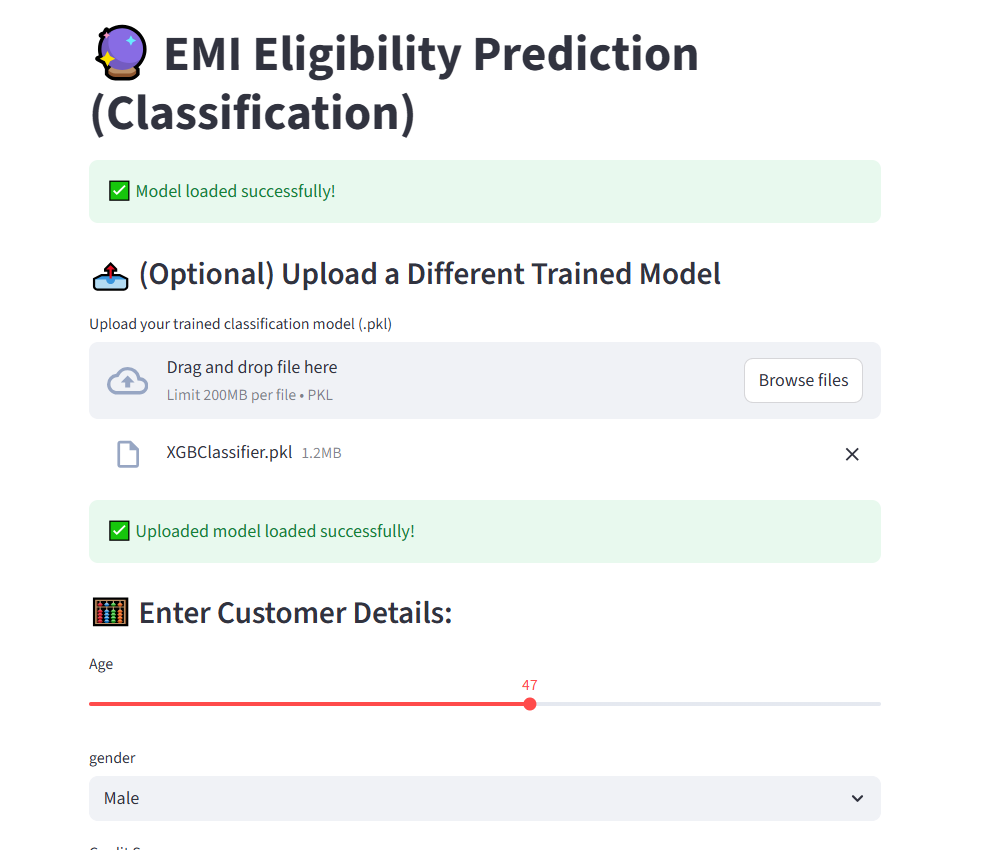

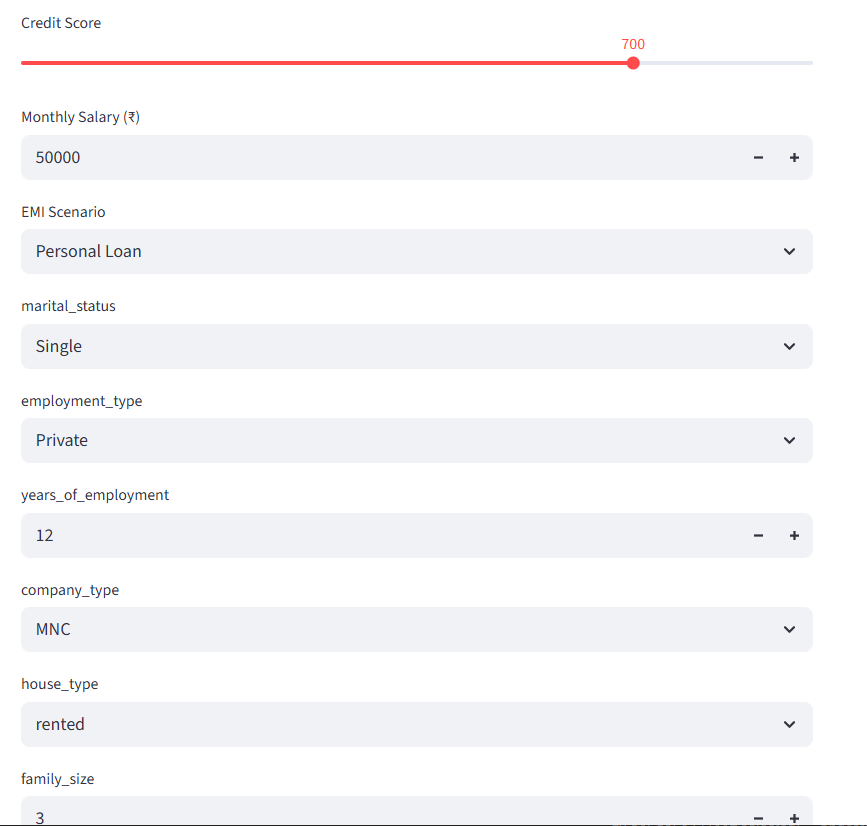

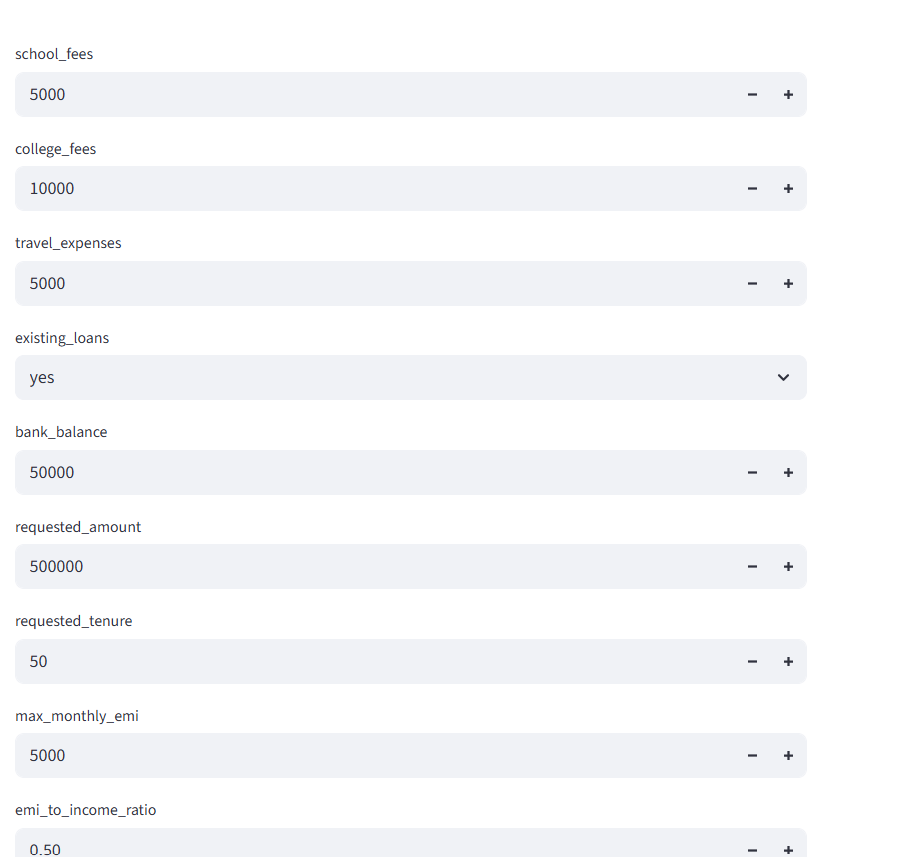

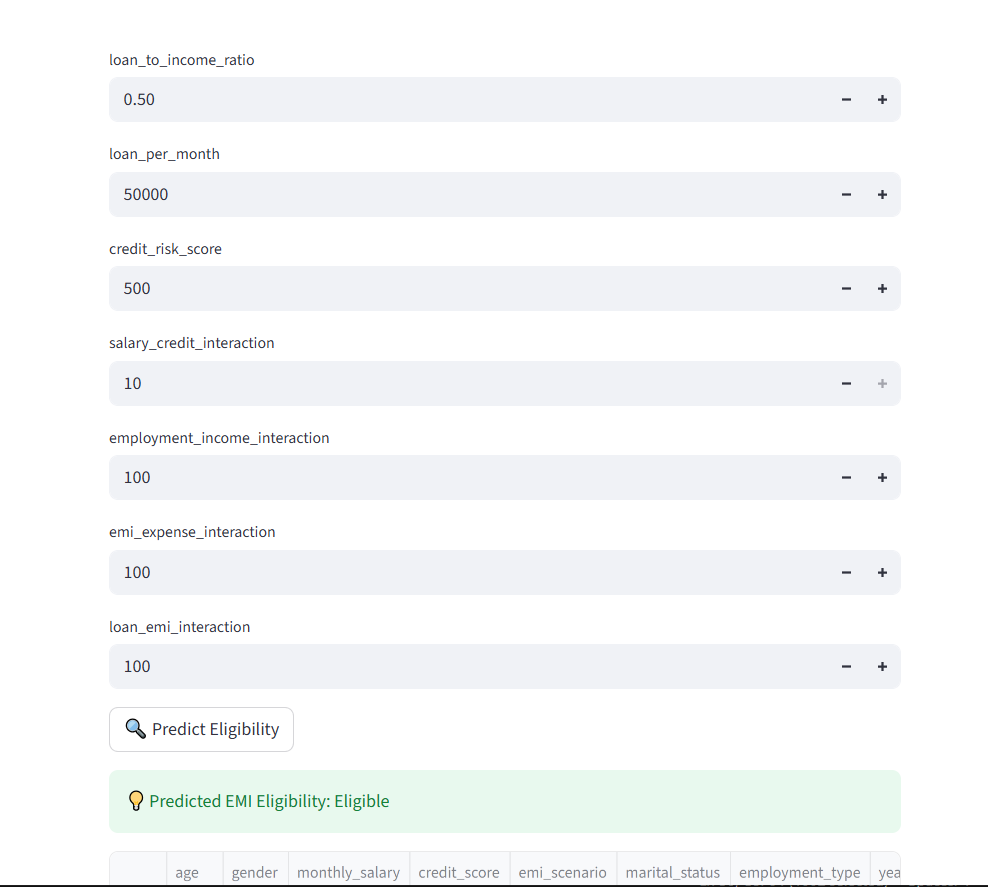

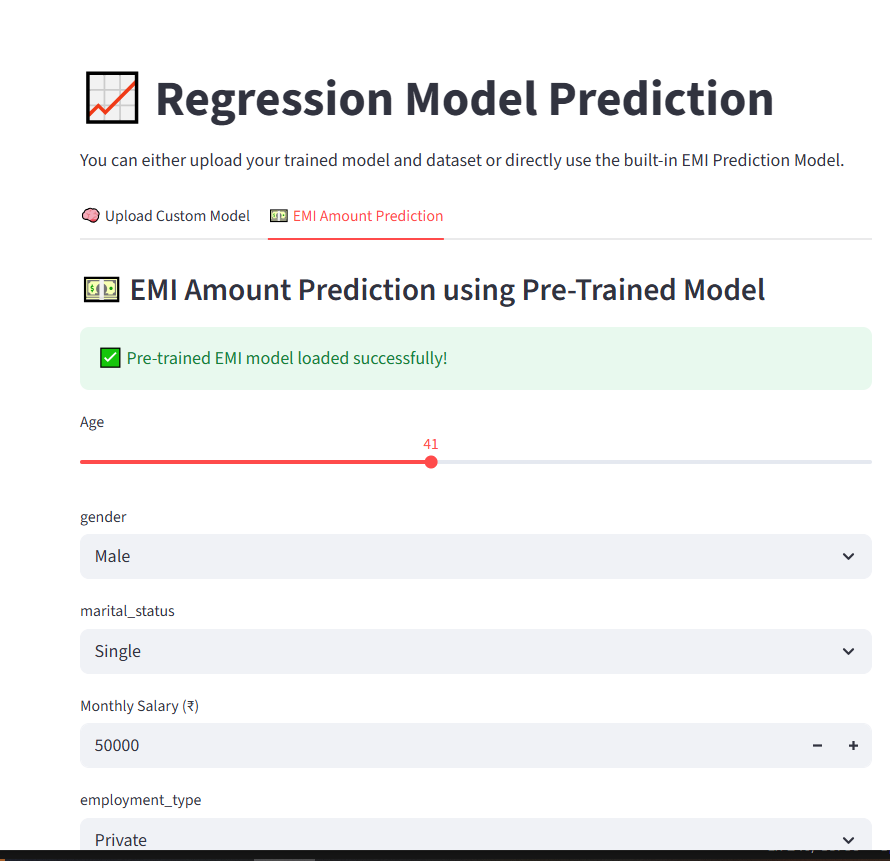

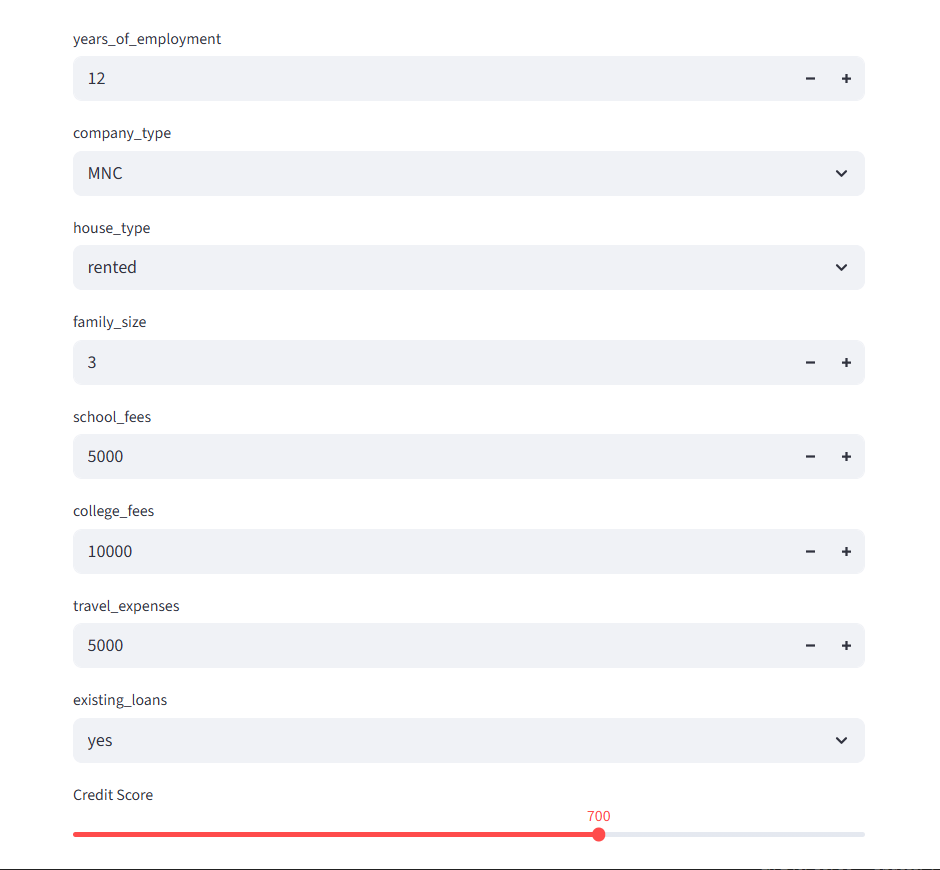

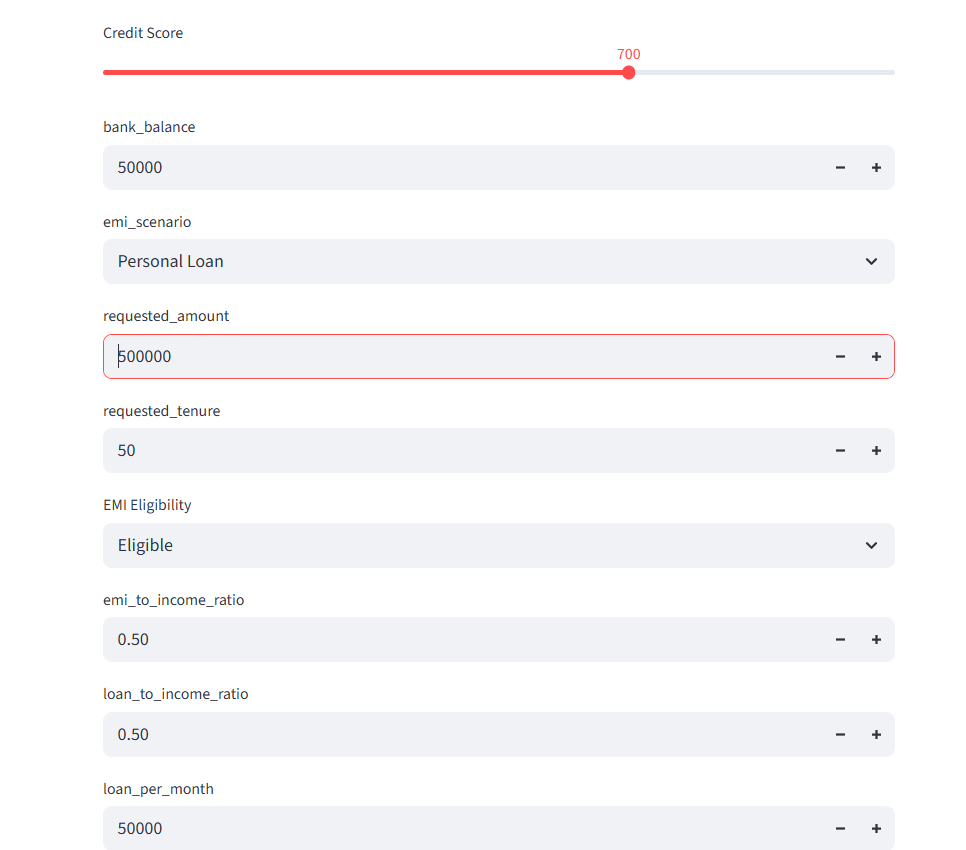

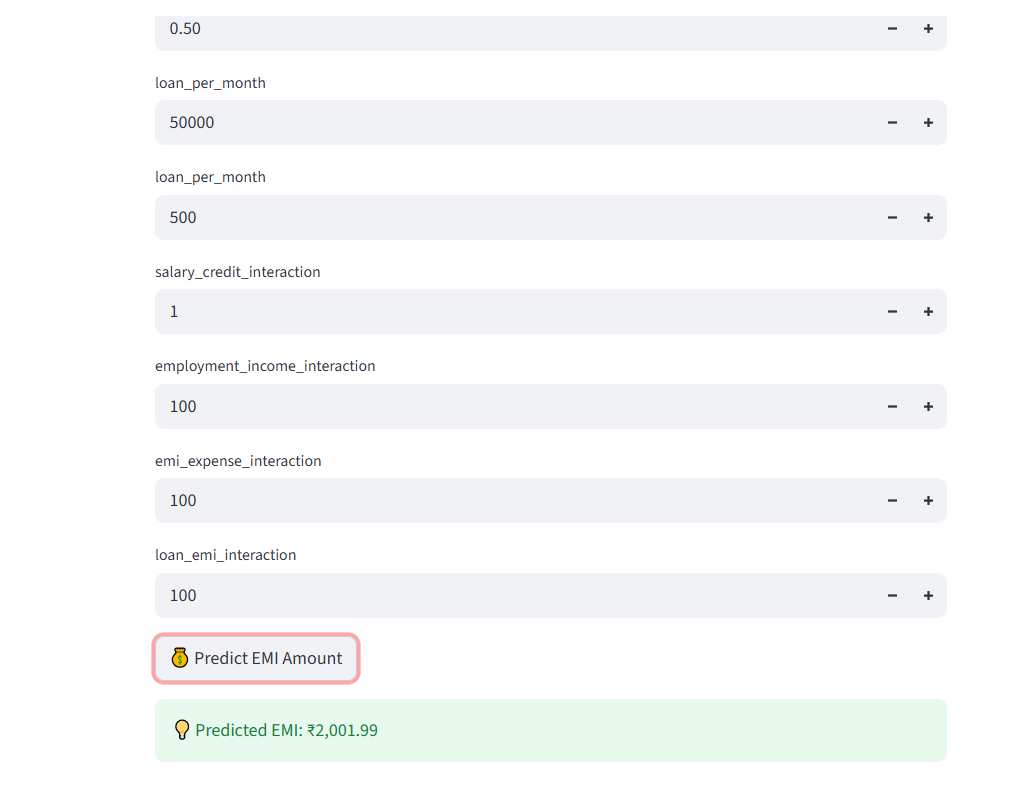

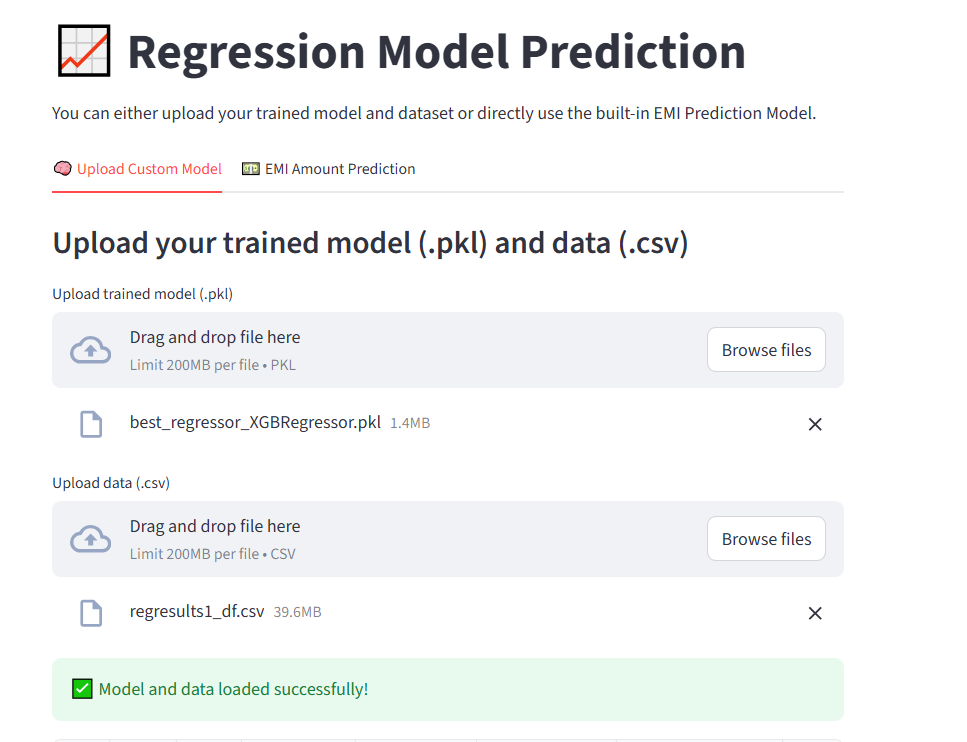

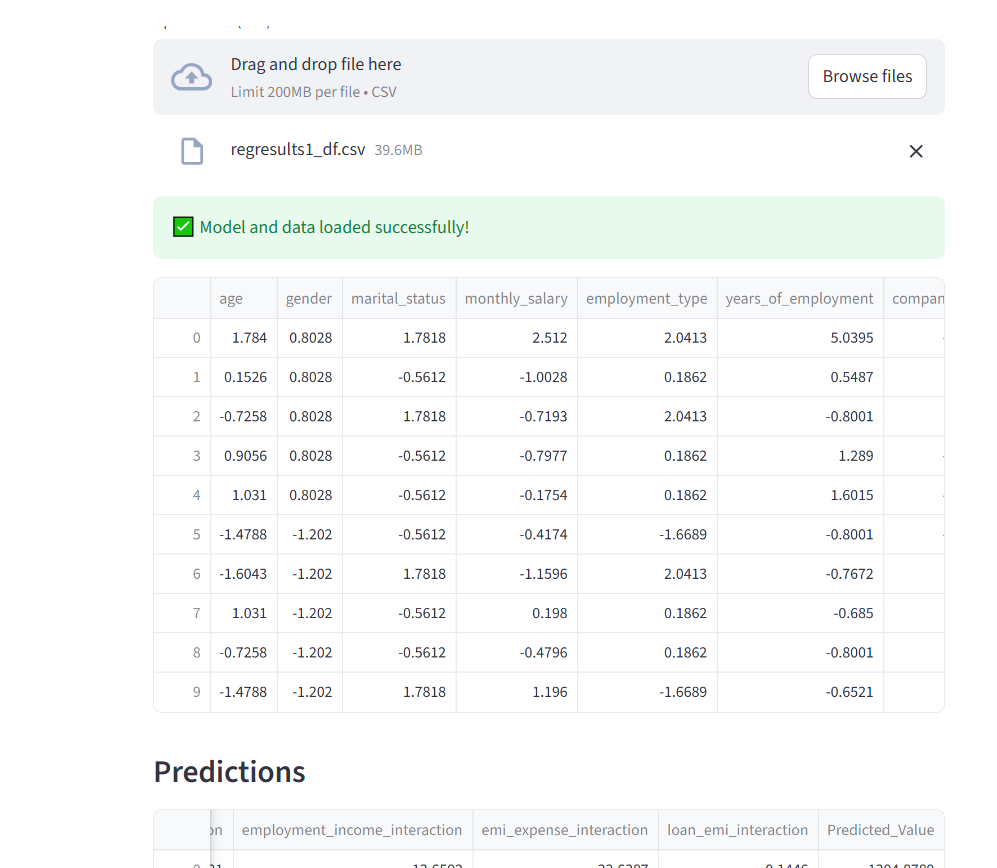

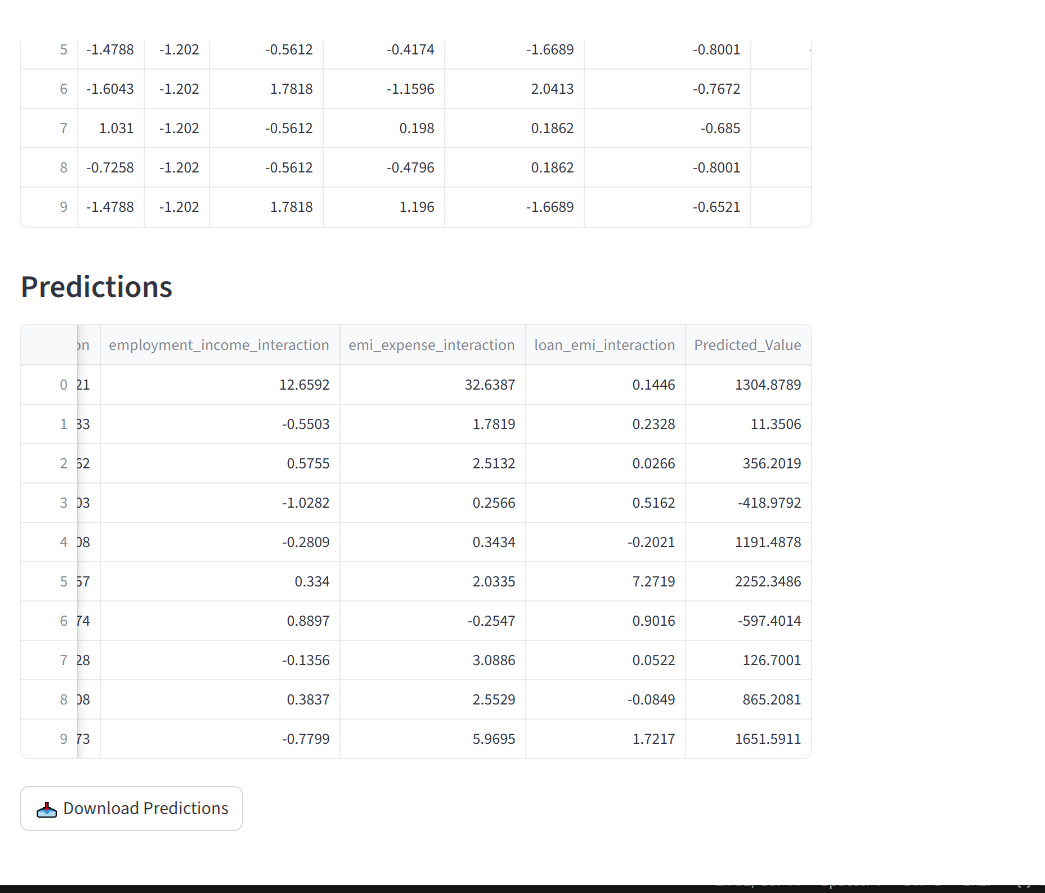

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***